# Assignment Part-I
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

## The company wants to know the following things about the prospective properties:

1. Which variables are significant in predicting the price of a house, and

2. How well those variables describe the price of a house.

 

3. Also, determine the optimal value of lambda for ridge and lasso regression.

 

# Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Importing all necessary libraries

In [214]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns',50)

import sklearn.metrics
from sklearn import linear_model, metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

## Reading the Input Data

In [215]:
# Reading the dataset

data = pd.read_csv('train.csv')

Lets view the data

In [216]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  ... Fireplaces  \
0          2003     Gable  CompShg     VinylSd     VinylSd  ...          0   
1          1976     Gable  CompShg     MetalSd     MetalSd  ...          1   
2          2002     Gable  CompShg     VinylSd     VinylSd  ...          1   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng  ...          1   
4          2000     Gable  CompShg     VinylSd     VinylSd  ...          1   

   FireplaceQu GarageType GarageYrBlt GarageFinish GarageCars GarageArea  \
0          NaN     Attchd      2003.0          RFn          2        548   
1           TA     Attchd      1976.0          RFn          2        460   
2           TA     Attchd      2001.0          RFn          2        608   
3           Gd     Detchd      1998.0          Unf          3        642   
4           TA     Attchd      2000.0          RFn          3        836   

  GarageQual GarageCond  PavedDrive WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0         TA         TA           Y          0           61              0   
1         TA         TA           Y        298            0              0   
2         TA         TA           Y          0           42              0   
3         TA         TA           Y          0           35            272   
4         TA         TA           Y        192           84              0   

   3SsnPorch ScreenPorch PoolArea PoolQC Fence  MiscFeature  MiscVal  MoSold  \
0          0           0        0    NaN   NaN          NaN        0       2   
1          0           0        0    NaN   NaN          NaN        0       5   
2          0           0        0    NaN   NaN          NaN        0       9   
3          0           0        0    NaN   NaN          NaN        0       2   
4          0           0        0    NaN   NaN          NaN        0      12   

   YrSold  SaleType  SaleCondition  SalePrice  
0    2008        WD         Normal     208500  
1    2007        WD         Normal     181500  
2    2008        WD         Normal     223500  
3    2006        WD        Abnorml     140000  
4    2008        WD         Normal     250000  

[5 rows x 81 columns]

### Shape of the Data

In [217]:
data.shape

(1460, 81)

In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [219]:
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

**"MSSubClass" should actually be object type, Hence change the data type from int to Object.**

In [220]:
data.MSSubClass = data.MSSubClass.astype("object")
data.MSSubClass.dtype

dtype('O')

#### Dropping the ID column

In [221]:
# Drop ID Column
data.drop('Id',axis=1,inplace=True)

## Checking for Missing Values

In [222]:
(((data.isnull().sum())/len(data))*100).sort_values()[data.isnull().sum()>0]


Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageYrBlt      5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageCond       5.547945
GarageType       5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64

## Handling Missing values 

### 1. For categorical Variables

In [223]:
data['Electrical'].isnull().sum()

1

In [224]:
data['Electrical'].value_counts(normalize = True)

SBrkr    0.914325
FuseA    0.064428
FuseF    0.018506
FuseP    0.002056
Mix      0.000685
Name: Electrical, dtype: float64

Since, more than 91 percent of values in the column 'Electrical' is same, the data here seems to be highly skewed, So lets drop the Column.


In [225]:
data = data.drop('Electrical', axis = 1)

In [226]:
# MasVnrType

data['MasVnrType'].value_counts(normalize = True)

None       0.595041
BrkFace    0.306474
Stone      0.088154
BrkCmn     0.010331
Name: MasVnrType, dtype: float64


From the Data definations we understand that the NULL values can be "None" in case of "MasVnrType"

In [227]:
data['MasVnrType'].replace(np.nan,'None', inplace=True)

In [228]:
data['MasVnrType'].isnull().sum()

0

In [229]:
# Basement colums

data['BsmtFinType2'].fillna('No Basement', inplace=True)
data['BsmtExposure'].fillna('No Basement', inplace=True)
data['BsmtQual'].fillna('No Basement', inplace=True)
data['BsmtCond'].fillna('No Basement', inplace=True)
data['BsmtFinType1'].fillna('No Basement', inplace=True)
data['BsmtFinType2'].fillna('No Basement', inplace=True)

In [230]:
data[['BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2']].isnull().sum()

BsmtFinType2    0
BsmtExposure    0
BsmtQual        0
BsmtCond        0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

In [231]:
# Garage Columns

data['GarageType'].fillna('No Garage', inplace=True)
data['GarageCond'].fillna('No Garage', inplace=True)
data['GarageFinish'].fillna('No Garage', inplace=True)
data['GarageQual'].fillna('No Garage', inplace=True)

In [232]:
data[['GarageType','GarageCond','GarageFinish','GarageQual']].isnull().sum()

GarageType      0
GarageCond      0
GarageFinish    0
GarageQual      0
dtype: int64

In [233]:
# Fireplace Quality

data['FireplaceQu'].fillna('No Fireplace', inplace = True)

In [234]:
data['FireplaceQu'].isnull().sum()

0

In [235]:
# Fence

data['Fence'].fillna('No Fence', inplace = True)

In [236]:
data['Fence'].isnull().sum()

0

In [237]:
# Alley

data['Alley'].fillna('No alley access',inplace = True)

In [238]:
data['Alley'].isnull().sum()

0

In [239]:
# Misc Feature

data['MiscFeature'].fillna('None', inplace = True)

In [240]:
data['MiscFeature'].isnull().sum()

0

In [241]:
#PoolQC

data['PoolQC'].fillna('No Pool', inplace = True)

In [242]:
data['PoolQC'].isnull().sum()

0

### 2. Missing values in Continuous Variable

#### Replacing Null values with Mean/Median

In [243]:
# Checking Summary

data.describe()

LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  \
count  1201.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     70.049958   10516.828082     6.099315     5.575342  1971.267808   
std      24.284752    9981.264932     1.382997     1.112799    30.202904   
min      21.000000    1300.000000     1.000000     1.000000  1872.000000   
25%      59.000000    7553.500000     5.000000     5.000000  1954.000000   
50%      69.000000    9478.500000     6.000000     5.000000  1973.000000   
75%      80.000000   11601.500000     7.000000     6.000000  2000.000000   
max     313.000000  215245.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count   1460.000000  1452.000000  1460.000000  1460.000000  1460.000000   
mean    1984.865753   103.685262   443.639726    46.549315   567.240411   
std       20.645407   181.066207   456.098091   161.319273   441.866955   
min     1950.000000     0.000000     0.000000     0.000000     0.000000   
25%     1967.000000     0.000000     0.000000     0.000000   223.000000   
50%     1994.000000     0.000000   383.500000     0.000000   477.500000   
75%     2004.000000   166.000000   712.250000     0.000000   808.000000   
max     2010.000000  1600.000000  5644.000000  1474.000000  2336.000000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean   1057.429452  1162.626712   346.992466      5.844521  1515.463699   
std     438.705324   386.587738   436.528436     48.623081   525.480383   
min       0.000000   334.000000     0.000000      0.000000   334.000000   
25%     795.750000   882.000000     0.000000      0.000000  1129.500000   
50%     991.500000  1087.000000     0.000000      0.000000  1464.000000   
75%    1298.250000  1391.250000   728.000000      0.000000  1776.750000   
max    6110.000000  4692.000000  2065.000000    572.000000  5642.000000   

       BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  \
count   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   
mean       0.425342      0.057534     1.565068     0.382877      2.866438   
std        0.518911      0.238753     0.550916     0.502885      0.815778   
min        0.000000      0.000000     0.000000     0.000000      0.000000   
25%        0.000000      0.000000     1.000000     0.000000      2.000000   
50%        0.000000      0.000000     2.000000     0.000000      3.000000   
75%        1.000000      0.000000     2.000000     1.000000      3.000000   
max        3.000000      2.000000     3.000000     2.000000      8.000000   

       KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars  \
count   1460.000000   1460.000000  1460.000000  1379.000000  1460.000000   
mean       1.046575      6.517808     0.613014  1978.506164     1.767123   
std        0.220338      1.625393     0.644666    24.689725     0.747315   
min        0.000000      2.000000     0.000000  1900.000000     0.000000   
25%        1.000000      5.000000     0.000000  1961.000000     1.000000   
50%        1.000000      6.000000     1.000000  1980.000000     2.000000   
75%        1.000000      7.000000     1.000000  2002.000000     2.000000   
max        3.000000     14.000000     3.000000  2010.000000     4.000000   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    472.980137    94.244521    46.660274      21.954110     3.409589   
std     213.804841   125.338794    66.256028      61.119149    29.317331   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     334.500000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    25.000000       0.000000     0.000000   
75%     576.000000   168.000000    68.000000       0.000000

In [244]:
data['MasVnrArea'].fillna(data['MasVnrArea'].mean(),inplace=True)
data['GarageYrBlt'].fillna(data['GarageYrBlt'].mean(),inplace=True)
data['LotFrontage'].fillna(data['LotFrontage'].mean(),inplace=True)

In [245]:
data[['MasVnrArea','GarageYrBlt','LotFrontage']].isnull().sum()

MasVnrArea     0
GarageYrBlt    0
LotFrontage    0
dtype: int64

In [246]:
data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 79, dtype: int64

In [247]:
data['MSZoning'].value_counts(normalize = True)

RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64

Very Few Zoning Classifications are Commercial

In [248]:
data['Street'].value_counts(normalize = True)

Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64

The data for Street is Highly Skewed, Lets do this Column


In [249]:
data = data.drop('Street', axis = 1)

In [250]:
data['Alley'].value_counts(normalize = True)

No alley access    0.937671
Grvl               0.034247
Pave               0.028082
Name: Alley, dtype: float64

Most of the houses do not have a Alley Access, and this results in high skewness, so lets drop the column

In [251]:
data = data.drop('Alley', axis = 1)

In [252]:
data['LotShape'].value_counts(normalize = True)

Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64

More than half of the houses, are regular in shape

In [253]:
data['LandContour'].value_counts(normalize = True)

Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64

Most of the Houses are on Flat level

In [254]:
data['Utilities'].value_counts(normalize = True)

AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64

More than 99% of the houses have all public Utilities,Hence we will drop this column


In [255]:
data = data.drop('Utilities', axis = 1)

In [256]:

data['LotConfig'].value_counts(normalize = True)

Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64

Most of the properties are located in the inside lot, a few are also present in the corners.


In [257]:

data['LandSlope'].value_counts(normalize = True)

Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlope, dtype: float64

Dropping the Column as it is highly skewed

In [258]:
data = data.drop('LandSlope', axis = 1)

In [259]:
data['Neighborhood'].value_counts(normalize = True).sort_values()

Blueste    0.001370
NPkVill    0.006164
Veenker    0.007534
BrDale     0.010959
Blmngtn    0.011644
MeadowV    0.011644
StoneBr    0.017123
SWISU      0.017123
ClearCr    0.019178
IDOTRR     0.025342
Timber     0.026027
NoRidge    0.028082
Mitchel    0.033562
Crawfor    0.034932
BrkSide    0.039726
SawyerW    0.040411
NWAmes     0.050000
Sawyer     0.050685
NridgHt    0.052740
Gilbert    0.054110
Somerst    0.058904
Edwards    0.068493
OldTown    0.077397
CollgCr    0.102740
NAmes      0.154110
Name: Neighborhood, dtype: float64

Categorizing into Others, The variables with very small values

In [260]:
data['Neighborhood'] = data['Neighborhood'].replace(['Blueste','NPkVill','Veenker','BrDale','MeadowV','Blmngtn'],'Others')

In [261]:
data['Neighborhood'].value_counts(normalize = True).sort_values()

SWISU      0.017123
StoneBr    0.017123
ClearCr    0.019178
IDOTRR     0.025342
Timber     0.026027
NoRidge    0.028082
Mitchel    0.033562
Crawfor    0.034932
BrkSide    0.039726
SawyerW    0.040411
Others     0.049315
NWAmes     0.050000
Sawyer     0.050685
NridgHt    0.052740
Gilbert    0.054110
Somerst    0.058904
Edwards    0.068493
OldTown    0.077397
CollgCr    0.102740
NAmes      0.154110
Name: Neighborhood, dtype: float64

In [262]:

data['Condition1'].value_counts(normalize = True).sort_values()

RRNe      0.001370
RRNn      0.003425
PosA      0.005479
RRAe      0.007534
PosN      0.013014
RRAn      0.017808
Artery    0.032877
Feedr     0.055479
Norm      0.863014
Name: Condition1, dtype: float64

Categorising variables with very small value into one variable

In [263]:
data['Condition1'] =data['Condition1'].replace(['RRNe','RRNn','PosA','RRAe'],'Others') 

In [264]:

data['Condition1'].value_counts(normalize = True).sort_values()

PosN      0.013014
Others    0.017808
RRAn      0.017808
Artery    0.032877
Feedr     0.055479
Norm      0.863014
Name: Condition1, dtype: float64

In [265]:

data['Condition2'].value_counts(normalize = True).sort_values()

RRAe      0.000685
RRAn      0.000685
PosA      0.000685
PosN      0.001370
Artery    0.001370
RRNn      0.001370
Feedr     0.004110
Norm      0.989726
Name: Condition2, dtype: float64

Proximity to various conditions for almost 99 % of the properties is Normal, So we will drop this column


In [266]:
data = data.drop('Condition2', axis = 1)

In [267]:


data['BldgType'].value_counts(normalize = True).sort_values()

2fmCon    0.021233
Twnhs     0.029452
Duplex    0.035616
TwnhsE    0.078082
1Fam      0.835616
Name: BldgType, dtype: float64

Type of dwelling is nearly 84% of houses are single-family detached

In [268]:
data['HouseStyle'].value_counts(normalize=True)

1Story    0.497260
2Story    0.304795
1.5Fin    0.105479
SLvl      0.044521
SFoyer    0.025342
1.5Unf    0.009589
2.5Unf    0.007534
2.5Fin    0.005479
Name: HouseStyle, dtype: float64

More than 49% of the houses are 1 story. Nearly 30% are 2 story houses.


In [269]:

data['OverallQual'].value_counts(normalize=True)

5     0.271918
6     0.256164
7     0.218493
8     0.115068
4     0.079452
9     0.029452
3     0.013699
10    0.012329
2     0.002055
1     0.001370
Name: OverallQual, dtype: float64

Rates the overall material and finish of the house for most of the houses have a rating of 5 and 6

In [270]:


data['OverallCond'].value_counts(normalize=True)

5    0.562329
6    0.172603
7    0.140411
8    0.049315
4    0.039041
3    0.017123
9    0.015068
2    0.003425
1    0.000685
Name: OverallCond, dtype: float64

Rates the overall condition of the house for more than 56% of the houses is 5


In [271]:
data['RoofStyle'].value_counts(normalize = True)

Gable      0.781507
Hip        0.195890
Flat       0.008904
Gambrel    0.007534
Mansard    0.004795
Shed       0.001370
Name: RoofStyle, dtype: float64

Type of roof for Nearly 78% of the houses is Gable

In [272]:
data['RoofMatl'].value_counts(normalize = True)

CompShg    0.982192
Tar&Grv    0.007534
WdShngl    0.004110
WdShake    0.003425
Metal      0.000685
Membran    0.000685
Roll       0.000685
ClyTile    0.000685
Name: RoofMatl, dtype: float64

Dropping "RoofMat1" as it is highly skewed towards one side 

In [273]:
data = data.drop('RoofMatl', axis = 1)

In [274]:

data['Exterior1st'].value_counts(normalize = True)

VinylSd    0.352740
HdBoard    0.152055
MetalSd    0.150685
Wd Sdng    0.141096
Plywood    0.073973
CemntBd    0.041781
BrkFace    0.034247
WdShing    0.017808
Stucco     0.017123
AsbShng    0.013699
BrkComm    0.001370
Stone      0.001370
AsphShn    0.000685
CBlock     0.000685
ImStucc    0.000685
Name: Exterior1st, dtype: float64

In [275]:
data['Exterior1st'] = data['Exterior1st'].replace(['CBlock','AsphShn','ImStucc','BrkComm','Stone','AsbShng'],'Others')

In [276]:

data['Exterior1st'].value_counts(normalize = True)

VinylSd    0.352740
HdBoard    0.152055
MetalSd    0.150685
Wd Sdng    0.141096
Plywood    0.073973
CemntBd    0.041781
BrkFace    0.034247
Others     0.018493
WdShing    0.017808
Stucco     0.017123
Name: Exterior1st, dtype: float64

In [277]:

data['Exterior2nd'].value_counts(normalize = True)

VinylSd    0.345205
MetalSd    0.146575
HdBoard    0.141781
Wd Sdng    0.134932
Plywood    0.097260
CmentBd    0.041096
Wd Shng    0.026027
Stucco     0.017808
BrkFace    0.017123
AsbShng    0.013699
ImStucc    0.006849
Brk Cmn    0.004795
Stone      0.003425
AsphShn    0.002055
CBlock     0.000685
Other      0.000685
Name: Exterior2nd, dtype: float64

In [278]:
data['Exterior2nd'] = data['Exterior2nd'].replace(['CBlock','Other','AsphShn','Brk Cmn','Stone','ImStucc','BrkFace','Stucco'],'Others')

In [279]:

data['Exterior2nd'].value_counts(normalize = True)

VinylSd    0.345205
MetalSd    0.146575
HdBoard    0.141781
Wd Sdng    0.134932
Plywood    0.097260
Others     0.053425
CmentBd    0.041096
Wd Shng    0.026027
AsbShng    0.013699
Name: Exterior2nd, dtype: float64

For houses with more than one covering, the second exterior covering in most houses is of Vinyl Siding

In [280]:
data['MasVnrType'].value_counts(normalize = True)

None       0.597260
BrkFace    0.304795
Stone      0.087671
BrkCmn     0.010274
Name: MasVnrType, dtype: float64

In [281]:

data['ExterQual'].value_counts(normalize = True)

TA    0.620548
Gd    0.334247
Ex    0.035616
Fa    0.009589
Name: ExterQual, dtype: float64

For most of the houses the quality of the exterior if Average or Typical

In [282]:
data['ExterCond'].value_counts(normalize = True)

TA    0.878082
Gd    0.100000
Fa    0.019178
Ex    0.002055
Po    0.000685
Name: ExterCond, dtype: float64

For almost 88% of the houses the present condition of the material on the exterior

In [283]:
data['Foundation'].value_counts(normalize = True)

PConc     0.443151
CBlock    0.434247
BrkTil    0.100000
Slab      0.016438
Stone     0.004110
Wood      0.002055
Name: Foundation, dtype: float64

44% of the houses have their foundation as Poured Contrete, and around 43% have Cinder Block as their Foundation

In [284]:

data['BsmtQual'].value_counts(normalize = True)

TA             0.444521
Gd             0.423288
Ex             0.082877
No Basement    0.025342
Fa             0.023973
Name: BsmtQual, dtype: float64

42% houses have the height of the basement between (90-99 inches), whereas 44% have the height of the basement between (80-89 inches), only 8% houses have a excellent basement height of more than 100 inches

In [285]:
data['BsmtCond'].value_counts(normalize = True)

TA             0.897945
Gd             0.044521
Fa             0.030822
No Basement    0.025342
Po             0.001370
Name: BsmtCond, dtype: float64

Basement quality of 90% of the houses is Typical(slight dampness)

In [286]:
data['BsmtExposure'].value_counts(normalize = True)

No             0.652740
Av             0.151370
Gd             0.091781
Mn             0.078082
No Basement    0.026027
Name: BsmtExposure, dtype: float64

Around 65% of the houses have no Exposure to the Basement

In [287]:

data['BsmtFinType1'].value_counts(normalize = True)

Unf            0.294521
GLQ            0.286301
ALQ            0.150685
BLQ            0.101370
Rec            0.091096
LwQ            0.050685
No Basement    0.025342
Name: BsmtFinType1, dtype: float64

In [288]:

data['BsmtFinType2'].value_counts(normalize = True)

Unf            0.860274
Rec            0.036986
LwQ            0.031507
No Basement    0.026027
BLQ            0.022603
ALQ            0.013014
GLQ            0.009589
Name: BsmtFinType2, dtype: float64

86% of the houses with multiple types are Unfinished

In [289]:
data['Heating'].value_counts(normalize = True)

GasA     0.978082
GasW     0.012329
Grav     0.004795
Wall     0.002740
OthW     0.001370
Floor    0.000685
Name: Heating, dtype: float64

Since 97% of the houses have Type of heating as "Gas forced warm air furnace", we will Drop this Column 

In [290]:
data = data.drop('Heating', axis = 1)

In [291]:
data['HeatingQC'].value_counts(normalize = True)

Ex    0.507534
TA    0.293151
Gd    0.165068
Fa    0.033562
Po    0.000685
Name: HeatingQC, dtype: float64

Heating quality and condition for around 51% of the houses is Excellent.

In [292]:
data['CentralAir'].value_counts(normalize = True)

Y    0.934932
N    0.065068
Name: CentralAir, dtype: float64

Dropping "CentralAir" column as it is highly skewed toward "yes", with nearly 94% of the values as Yes

In [293]:
data['KitchenQual'].value_counts(normalize = True)

TA    0.503425
Gd    0.401370
Ex    0.068493
Fa    0.026712
Name: KitchenQual, dtype: float64

50 % of the Houses have Typical/Average  Kitchen quality

In [294]:

data['Functional'].value_counts(normalize = True)

Typ     0.931507
Min2    0.023288
Min1    0.021233
Mod     0.010274
Maj1    0.009589
Maj2    0.003425
Sev     0.000685
Name: Functional, dtype: float64

Dropping this column as it highly skewed

In [295]:
data = data.drop('Functional', axis = 1)

In [296]:


data['Fireplaces'].value_counts(normalize = True)

0    0.472603
1    0.445205
2    0.078767
3    0.003425
Name: Fireplaces, dtype: float64

In [297]:
data['FireplaceQu'].value_counts(normalize = True)

No Fireplace    0.472603
Gd              0.260274
TA              0.214384
Fa              0.022603
Ex              0.016438
Po              0.013699
Name: FireplaceQu, dtype: float64

47% of the houses have No Fireplaces

In [298]:

data['GarageType'].value_counts(normalize = True)

Attchd       0.595890
Detchd       0.265068
BuiltIn      0.060274
No Garage    0.055479
Basment      0.013014
CarPort      0.006164
2Types       0.004110
Name: GarageType, dtype: float64

Around 60% of the houses have the Garage attached to the house

In [299]:
data['GarageFinish'].value_counts(normalize = True)

Unf          0.414384
RFn          0.289041
Fin          0.241096
No Garage    0.055479
Name: GarageFinish, dtype: float64

for 41% of houses Interior finish of the garage are in Unfinished State

In [300]:

data['GarageQual'].value_counts(normalize = True)

TA           0.897945
No Garage    0.055479
Fa           0.032877
Gd           0.009589
Po           0.002055
Ex           0.002055
Name: GarageQual, dtype: float64

Dropping this column as it is highly Skewed

In [301]:
data = data.drop('GarageQual', axis = 1)

In [302]:
data['GarageCond'].value_counts(normalize = True)

TA           0.908219
No Garage    0.055479
Fa           0.023973
Gd           0.006164
Po           0.004795
Ex           0.001370
Name: GarageCond, dtype: float64

Dropping this column as it is highly skewed

In [303]:
data = data.drop('GarageCond', axis = 1)

In [304]:

data['PavedDrive'].value_counts(normalize = True)


Y    0.917808
N    0.061644
P    0.020548
Name: PavedDrive, dtype: float64

Dropping this column as it is highly Skewed 

In [305]:
data = data.drop('PavedDrive', axis = 1)

In [306]:
data['PoolQC'].value_counts(normalize = True)

No Pool    0.995205
Gd         0.002055
Fa         0.001370
Ex         0.001370
Name: PoolQC, dtype: float64

Dropping this column as it is highly Skewed 

In [307]:
data = data.drop('PoolQC', axis = 1)

In [308]:

data['Fence'].value_counts(normalize = True)

No Fence    0.807534
MnPrv       0.107534
GdPrv       0.040411
GdWo        0.036986
MnWw        0.007534
Name: Fence, dtype: float64

Around 80% of the houses have no Fence

In [309]:
data['MiscFeature'].value_counts(normalize = True)

None    0.963014
Shed    0.033562
Othr    0.001370
Gar2    0.001370
TenC    0.000685
Name: MiscFeature, dtype: float64

Dropping this column as it is highly Skewed 

In [310]:
data = data.drop('MiscFeature', axis = 1)

In [311]:
data['SaleType'].value_counts(normalize = True)

WD       0.867808
New      0.083562
COD      0.029452
ConLD    0.006164
ConLw    0.003425
ConLI    0.003425
CWD      0.002740
Oth      0.002055
Con      0.001370
Name: SaleType, dtype: float64

Combining values of the column with very small quantity to a single level.

In [312]:
data['SaleType'] = data['SaleType'].replace(['Con','Oth','CWD','ConLI','ConLw','ConLD'],'Others')

In [313]:
data['SaleType'].value_counts(normalize = True)

WD        0.867808
New       0.083562
COD       0.029452
Others    0.019178
Name: SaleType, dtype: float64

In [314]:

data['SaleCondition'].value_counts(normalize = True)

Normal     0.820548
Partial    0.085616
Abnorml    0.069178
Family     0.013699
Alloca     0.008219
AdjLand    0.002740
Name: SaleCondition, dtype: float64

Around 82% of the Houses have a Normal Condition of sale

In [315]:
data['PoolArea'].value_counts(normalize = True)

0      0.995205
738    0.000685
648    0.000685
576    0.000685
555    0.000685
519    0.000685
512    0.000685
480    0.000685
Name: PoolArea, dtype: float64

Dropping this column as it is highly Skewed 

In [316]:
data = data.drop('PoolArea', axis = 1)

In [317]:
data['ScreenPorch'].value_counts(normalize = True)

0      0.920548
192    0.004110
224    0.003425
120    0.003425
189    0.002740
         ...   
182    0.000685
440    0.000685
178    0.000685
312    0.000685
480    0.000685
Name: ScreenPorch, Length: 76, dtype: float64

Dropping this column as it is highly Skewed 

In [318]:
data = data.drop('ScreenPorch', axis = 1)

In [319]:

data['3SsnPorch'].value_counts(normalize = True)

0      0.983562
168    0.002055
216    0.001370
144    0.001370
180    0.001370
245    0.000685
238    0.000685
290    0.000685
196    0.000685
182    0.000685
407    0.000685
304    0.000685
162    0.000685
153    0.000685
320    0.000685
140    0.000685
130    0.000685
96     0.000685
23     0.000685
508    0.000685
Name: 3SsnPorch, dtype: float64

Dropping this column as it is highly Skewed 

In [320]:
data = data.drop('3SsnPorch', axis = 1)

In [321]:
data['EnclosedPorch'].value_counts(normalize = True)

0      0.857534
112    0.010274
96     0.004110
120    0.003425
144    0.003425
         ...   
174    0.000685
177    0.000685
183    0.000685
189    0.000685
552    0.000685
Name: EnclosedPorch, Length: 120, dtype: float64

In [322]:

data['OpenPorchSF'].value_counts(normalize = True)

0      0.449315
36     0.019863
48     0.015068
20     0.014384
40     0.013014
         ...   
159    0.000685
156    0.000685
148    0.000685
142    0.000685
119    0.000685
Name: OpenPorchSF, Length: 202, dtype: float64

In [323]:
data['WoodDeckSF'].value_counts(normalize = True)

0      0.521233
192    0.026027
100    0.024658
144    0.022603
120    0.021233
         ...   
269    0.000685
265    0.000685
263    0.000685
260    0.000685
215    0.000685
Name: WoodDeckSF, Length: 274, dtype: float64

In [324]:

data['KitchenAbvGr'].value_counts(normalize = True)


1    0.953425
2    0.044521
3    0.001370
0    0.000685
Name: KitchenAbvGr, dtype: float64

Let us drop this column as it is highly Skewed


In [325]:
data = data.drop('KitchenAbvGr', axis =1)

In [326]:
data['BsmtHalfBath'].value_counts(normalize = True)

0    0.943836
1    0.054795
2    0.001370
Name: BsmtHalfBath, dtype: float64

Since this column is highly skewed, Let us drop this column

In [327]:
data = data.drop('BsmtHalfBath', axis =1)

In [328]:

data['LowQualFinSF'].value_counts(normalize = True)

0      0.982192
80     0.002055
360    0.001370
528    0.000685
53     0.000685
120    0.000685
144    0.000685
156    0.000685
205    0.000685
232    0.000685
234    0.000685
371    0.000685
572    0.000685
390    0.000685
392    0.000685
397    0.000685
420    0.000685
473    0.000685
479    0.000685
481    0.000685
513    0.000685
514    0.000685
515    0.000685
384    0.000685
Name: LowQualFinSF, dtype: float64

Dropping this Column,as is it highly skewed

In [329]:
data = data.drop('LowQualFinSF', axis =1)

In [330]:
data['BsmtFinSF2'].value_counts(normalize = True)

0       0.885616
180     0.003425
374     0.002055
551     0.001370
93      0.001370
          ...   
532     0.000685
544     0.000685
546     0.000685
547     0.000685
1474    0.000685
Name: BsmtFinSF2, Length: 144, dtype: float64

Since Around 89% of the value is 0, Lets drop this column


In [331]:
data = data.drop('BsmtFinSF2', axis =1)

In [332]:
data.shape

(1460, 59)

 Shape of the data after dropping few of the Skewed columns

Since we have Variable "GarageYrBlt", which tell us when the Garage was build

In [333]:
#calcuting Age 
import datetime
Today = datetime.datetime.now()

data['Age of Garage'] = Today.year - data['GarageYrBlt']
data['Age of Garage'].value_counts()

42.493836     81
16.000000     65
15.000000     59
17.000000     53
18.000000     50
              ..
115.000000     1
113.000000     1
121.000000     1
88.000000      1
94.000000      1
Name: Age of Garage, Length: 98, dtype: int64

In [334]:
#Dropping GarageYrBlt column
data.drop('GarageYrBlt',axis=1,inplace=True)

In [335]:
data['Age of Garage'].describe()

count    1460.000000
mean       42.493836
std        23.994583
min        11.000000
25%        20.000000
50%        42.493836
75%        59.000000
max       121.000000
Name: Age of Garage, dtype: float64

In [336]:
# House Last Sold

data['Last Sold'] = Today.year - data['YrSold']
data['Last Sold'].value_counts()

12    338
14    329
15    314
13    304
11    175
Name: Last Sold, dtype: int64

In [337]:
# Age of the Building.House

data['Age of Building'] = Today.year - data['YearBuilt']
data.drop('YearBuilt',axis=1,inplace=True)

In [338]:
# House Last Remodelled
data['Last Remodelled'] = Today.year - data['YrSold']
data.drop('YearRemodAdd',axis=1,inplace=True)

In [339]:
data[['Age of Garage','Last Sold','Age of Building','Last Remodelled']].describe()

Age of Garage    Last Sold  Age of Building  Last Remodelled
count    1460.000000  1460.000000      1460.000000      1460.000000
mean       42.493836    13.184247        49.732192        13.184247
std        23.994583     1.328095        30.202904         1.328095
min        11.000000    11.000000        11.000000        11.000000
25%        20.000000    12.000000        21.000000        12.000000
50%        42.493836    13.000000        48.000000        13.000000
75%        59.000000    14.000000        67.000000        14.000000
max       121.000000    15.000000       149.000000        15.000000

In [340]:
# Number of Columns after Removing Few

data.shape

(1460, 60)

## Checking Target Variable

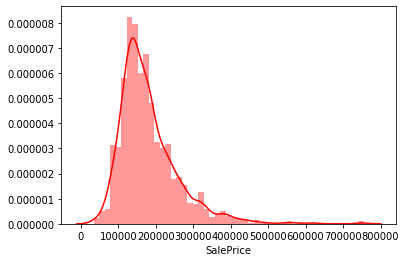

In [341]:
#Check for type of distribution and outliers

sns.distplot(data['SalePrice'],  color= 'r')


This Column is Right Skewed

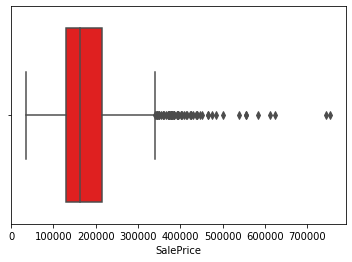

In [342]:
#lets Check for Outliers
sns.boxplot(data['SalePrice'],  color= 'r')

The data had Some Outliers as well

Lets treat the Skewness by applying Log Transformation

In [343]:
data["SalePrice"] = np.log(data["SalePrice"])

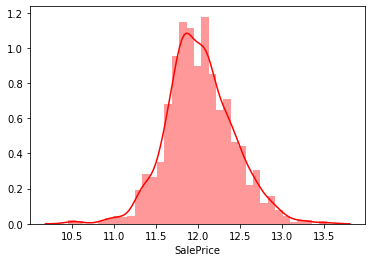

In [344]:
sns.distplot(data['SalePrice'],  color= 'r')

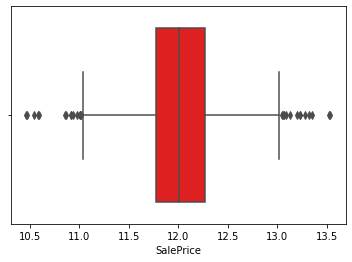

In [345]:

sns.boxplot(data['SalePrice'],  color= 'r')

## Exploratory Data Analysis

### Univariate Analysis

In [427]:
#Univariate Analysis of Categorical columns
def countplot(features, rows, cols):
    fig=plt.figure(figsize=(30,120))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        sns.countplot(x=feature,data=data, palette = "rainbow")
        plt.xticks(rotation = 60,fontsize=20)
        ax.set_title(feature,fontsize=25)
       
    fig.tight_layout()  
    plt.show()

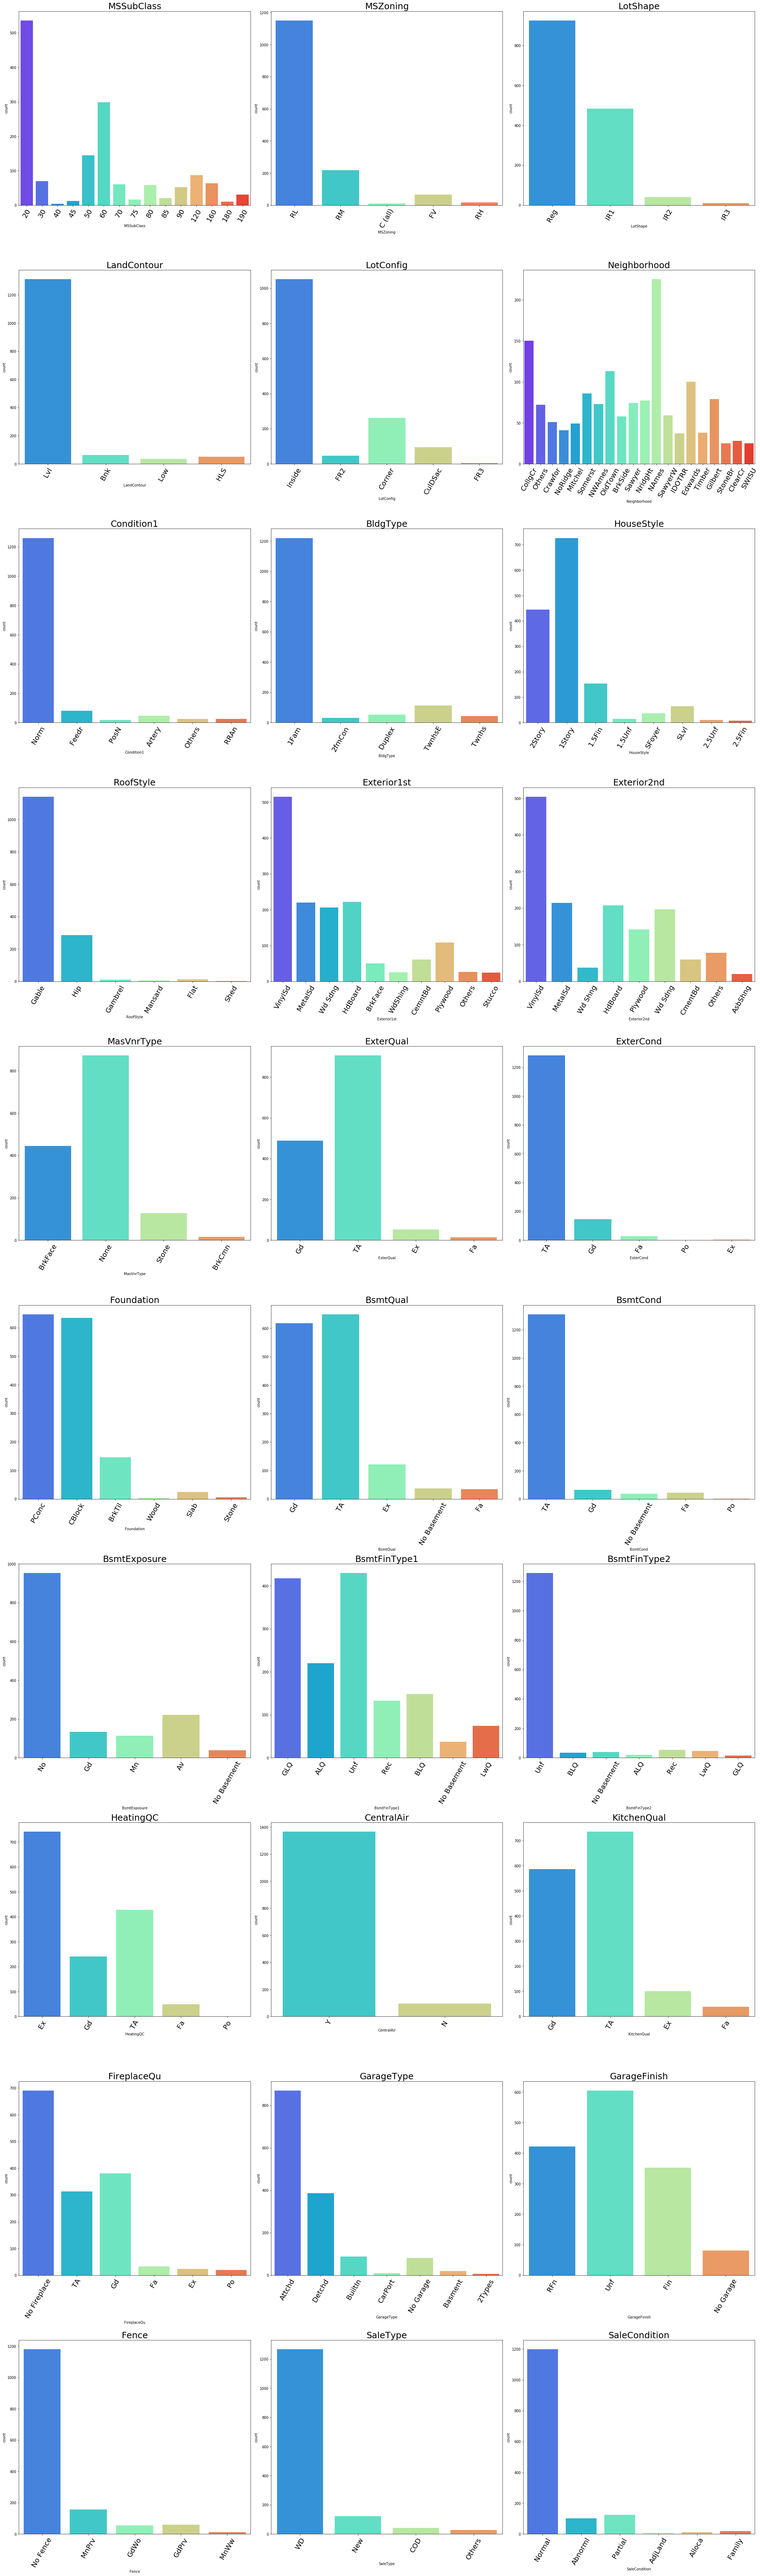

In [428]:
features=list((data.dtypes[data.dtypes == np.object]).index)
countplot(features,12, 3)

From the Graphs Above, we can deduce that most of the houses have -

1. story 1946 and newer all styles under MSSuclass.
2. Residential Low Density MSZoning.
3. Regular lot shape.
4. Located in the neighborhood of North Ames.
5. Single family - 1 story houses in normal condition.
6. Gable roof style, Vinyl sd exterior covering of the house with good quality.
7. Heating/Kitchen/Fir place/Garage are also in good or average condition.
8. Normal sale condition with Conventional Warranty Deed sale type.1
9. Flat land Contour
10. Normal Sale Condition

In [348]:
#Univariate Analysis of Numerical columns
def distplot(features, rows, cols):
    fig=plt.figure(figsize=(30,120))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        sns.distplot(data[feature], hist = True, rug = True, rug_kws = {'color' : 'r'},kde_kws = {'bw' : 1})
        plt.xticks(rotation = 60,fontsize=20)
        ax.set_title(feature,fontsize=20)
       
    fig.tight_layout()  
    plt.show()

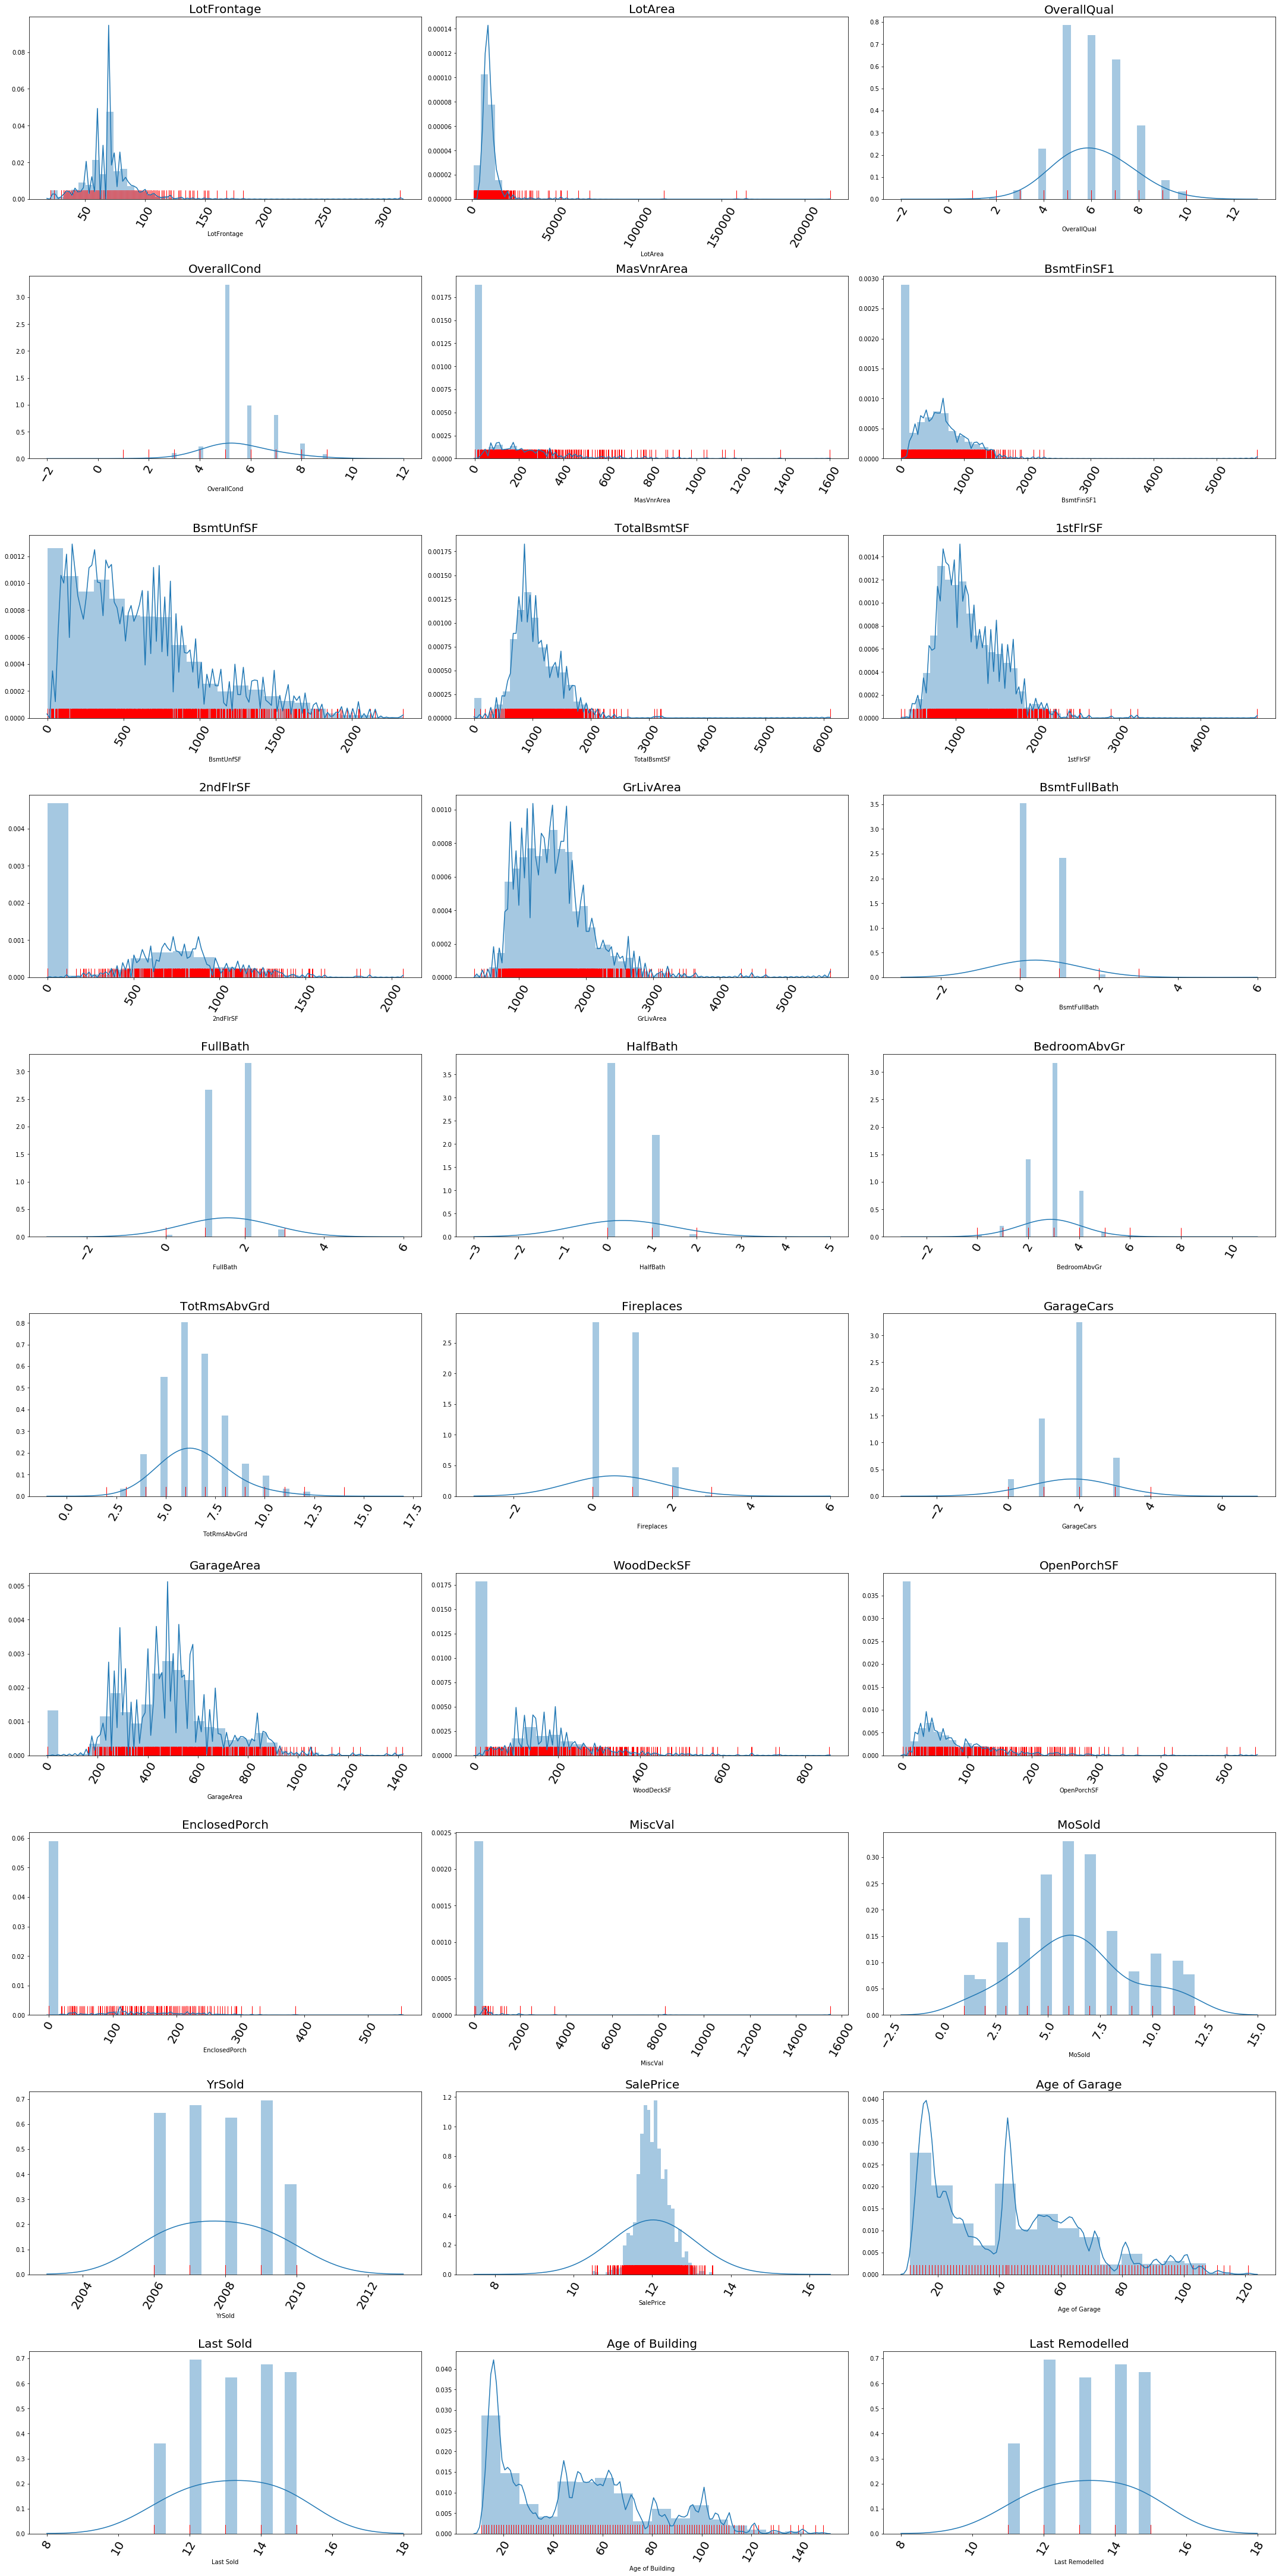

In [349]:
features_n=list((data.dtypes[data.dtypes != np.object]).index)
distplot(features_n,20, 3)

## Bivariate Analysis


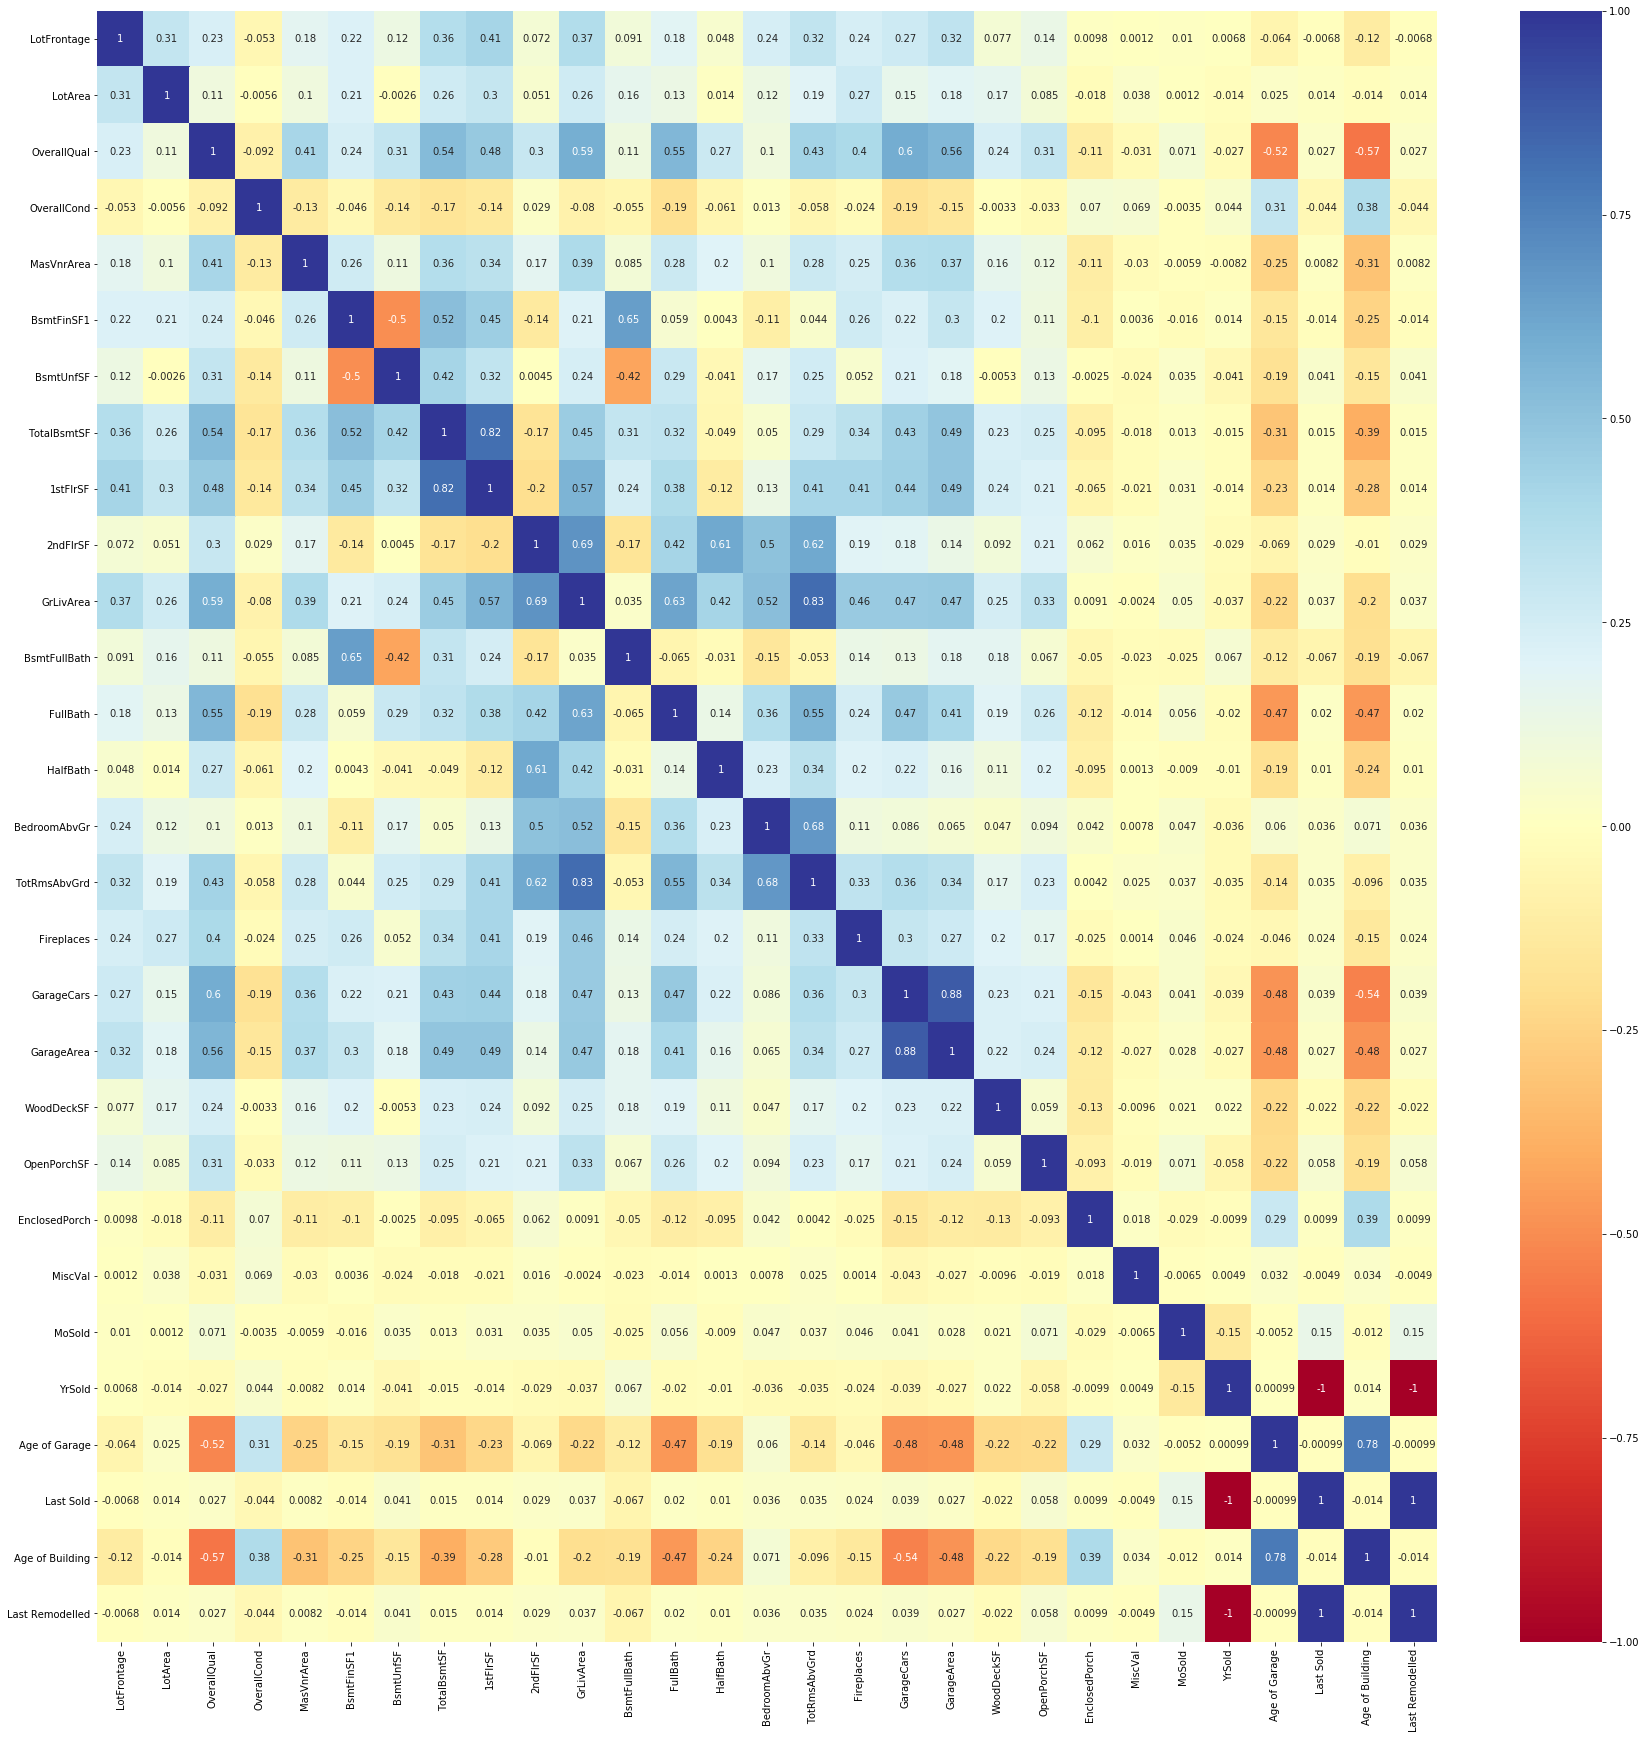

In [350]:
# Heatmap to check Correlation/multicollinearity
plt.figure(figsize=(30,30))
data_corr = data.drop('SalePrice',axis=1)
sns.heatmap(data_corr.corr(),annot=True,cmap='RdYlBu')
plt.show()

#### INSIGHT :
##### High correlation exist between -
1. GarageCars & GarageArea - 0.88
2. TotalRmsAbvGrd & GrLivArea - 0.83
3. TotalBsmtSF & 1stFlrSF - 0.82

##### Let's drop them.

In [351]:
data.drop(['GrLivArea','1stFlrSF','GarageArea'],axis=1,inplace=True)

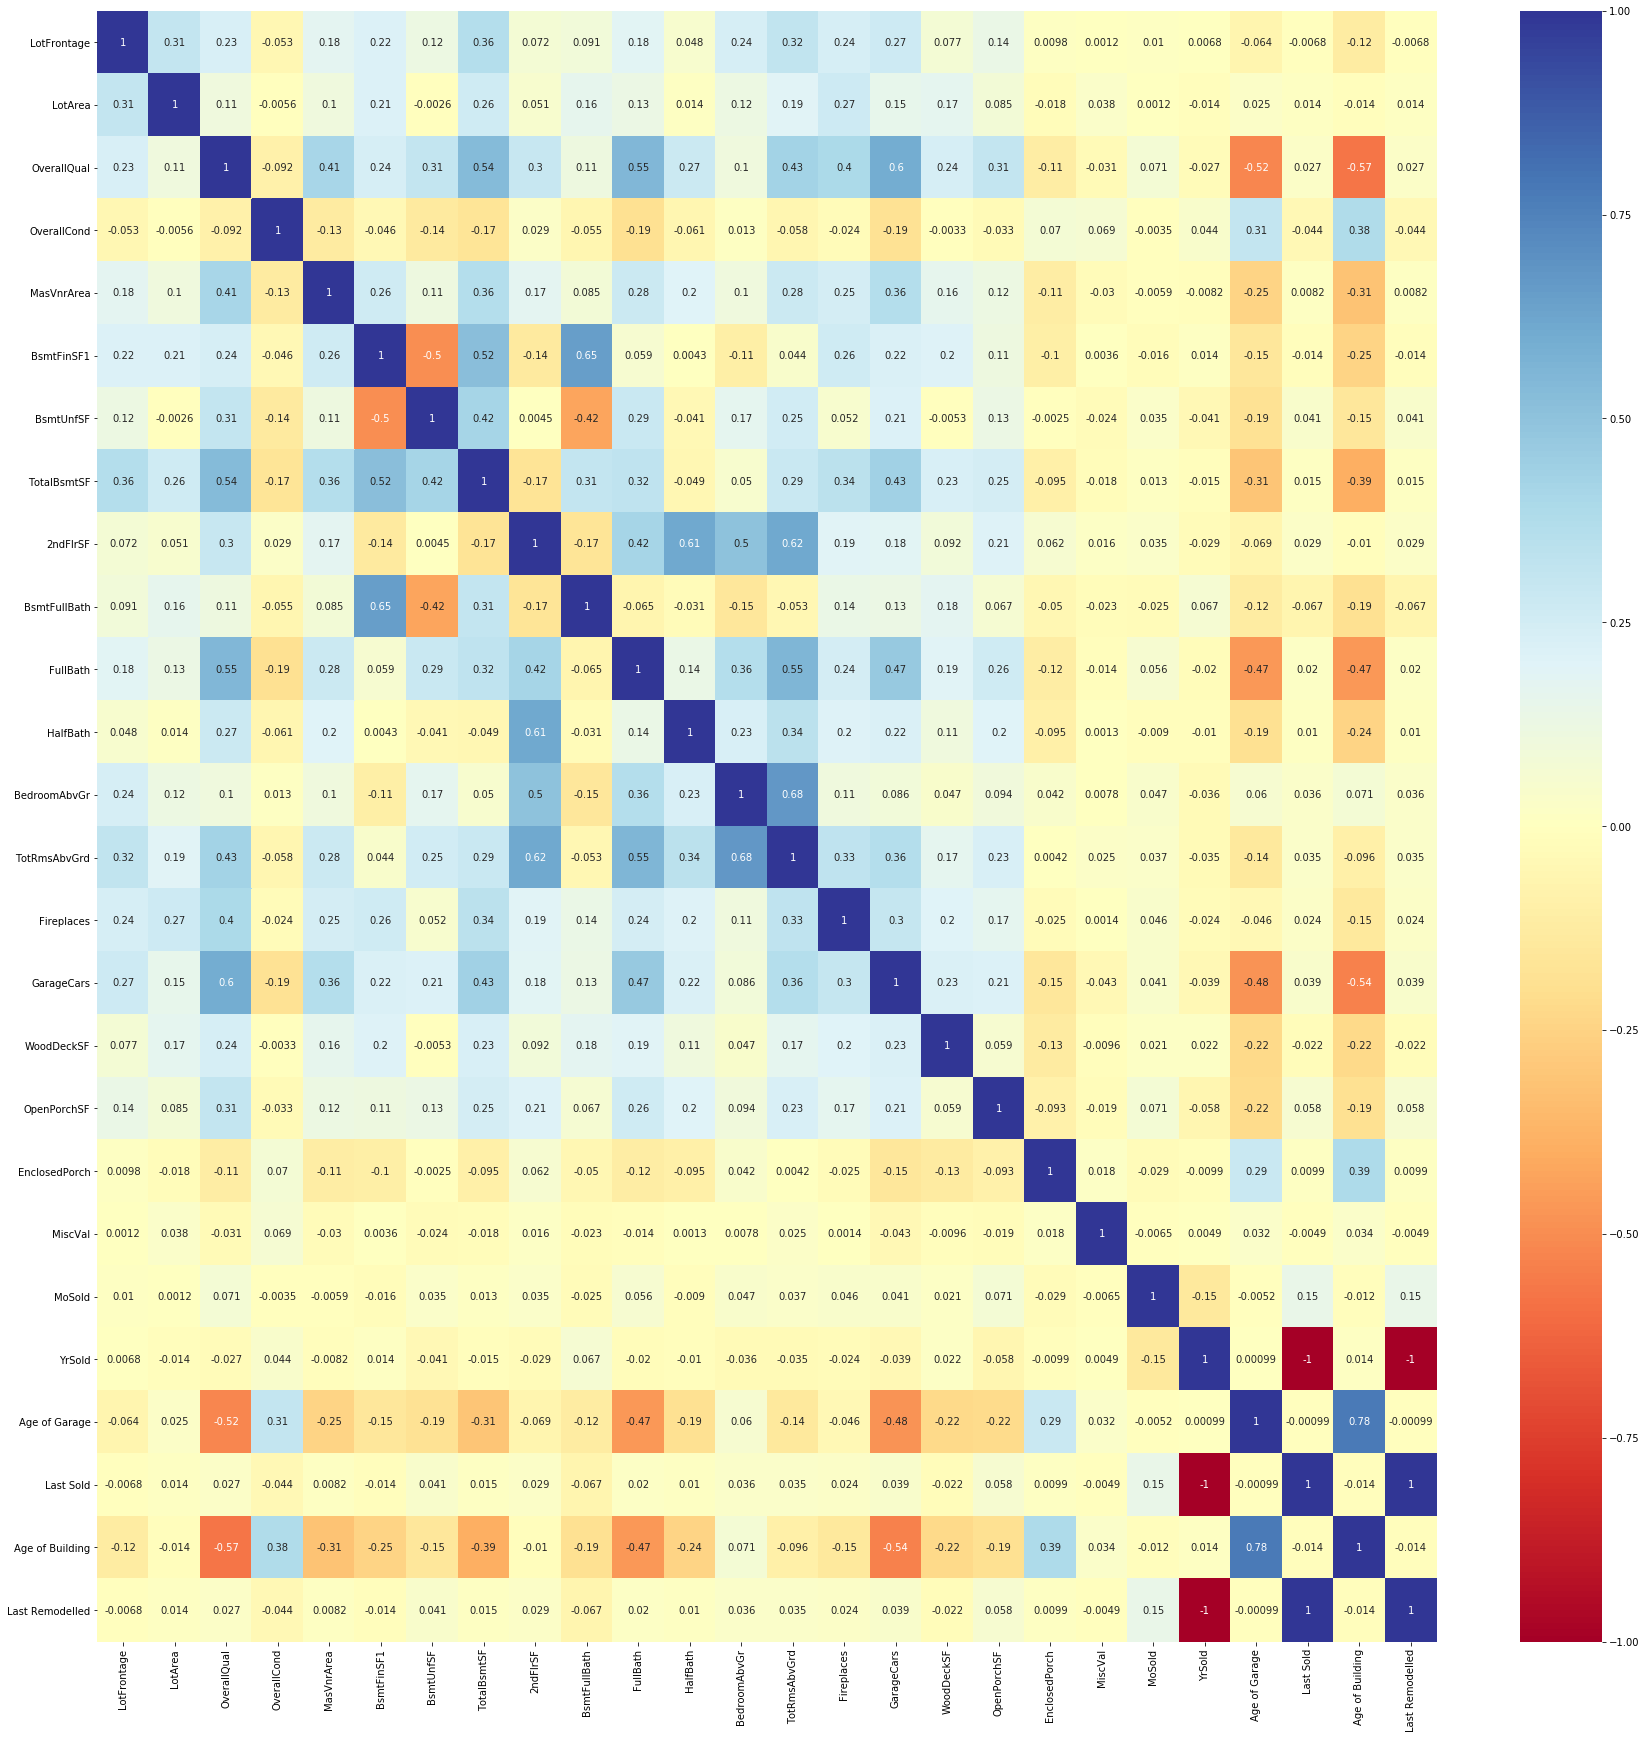

In [352]:
plt.figure(figsize=(30,30))
data_corr = data.drop('SalePrice',axis=1)
sns.heatmap(data_corr.corr(),annot=True,cmap='RdYlBu')
plt.show()

In [353]:
def scatterplot(features, rows, cols):
    fig=plt.figure(figsize=(30,120))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        sns.scatterplot(x=feature,y='SalePrice',data=data)
        plt.xticks(rotation = 60)
        ax.set_title(feature+" v/s SalePrice",fontsize=20)
       
    fig.tight_layout()  
    plt.show()

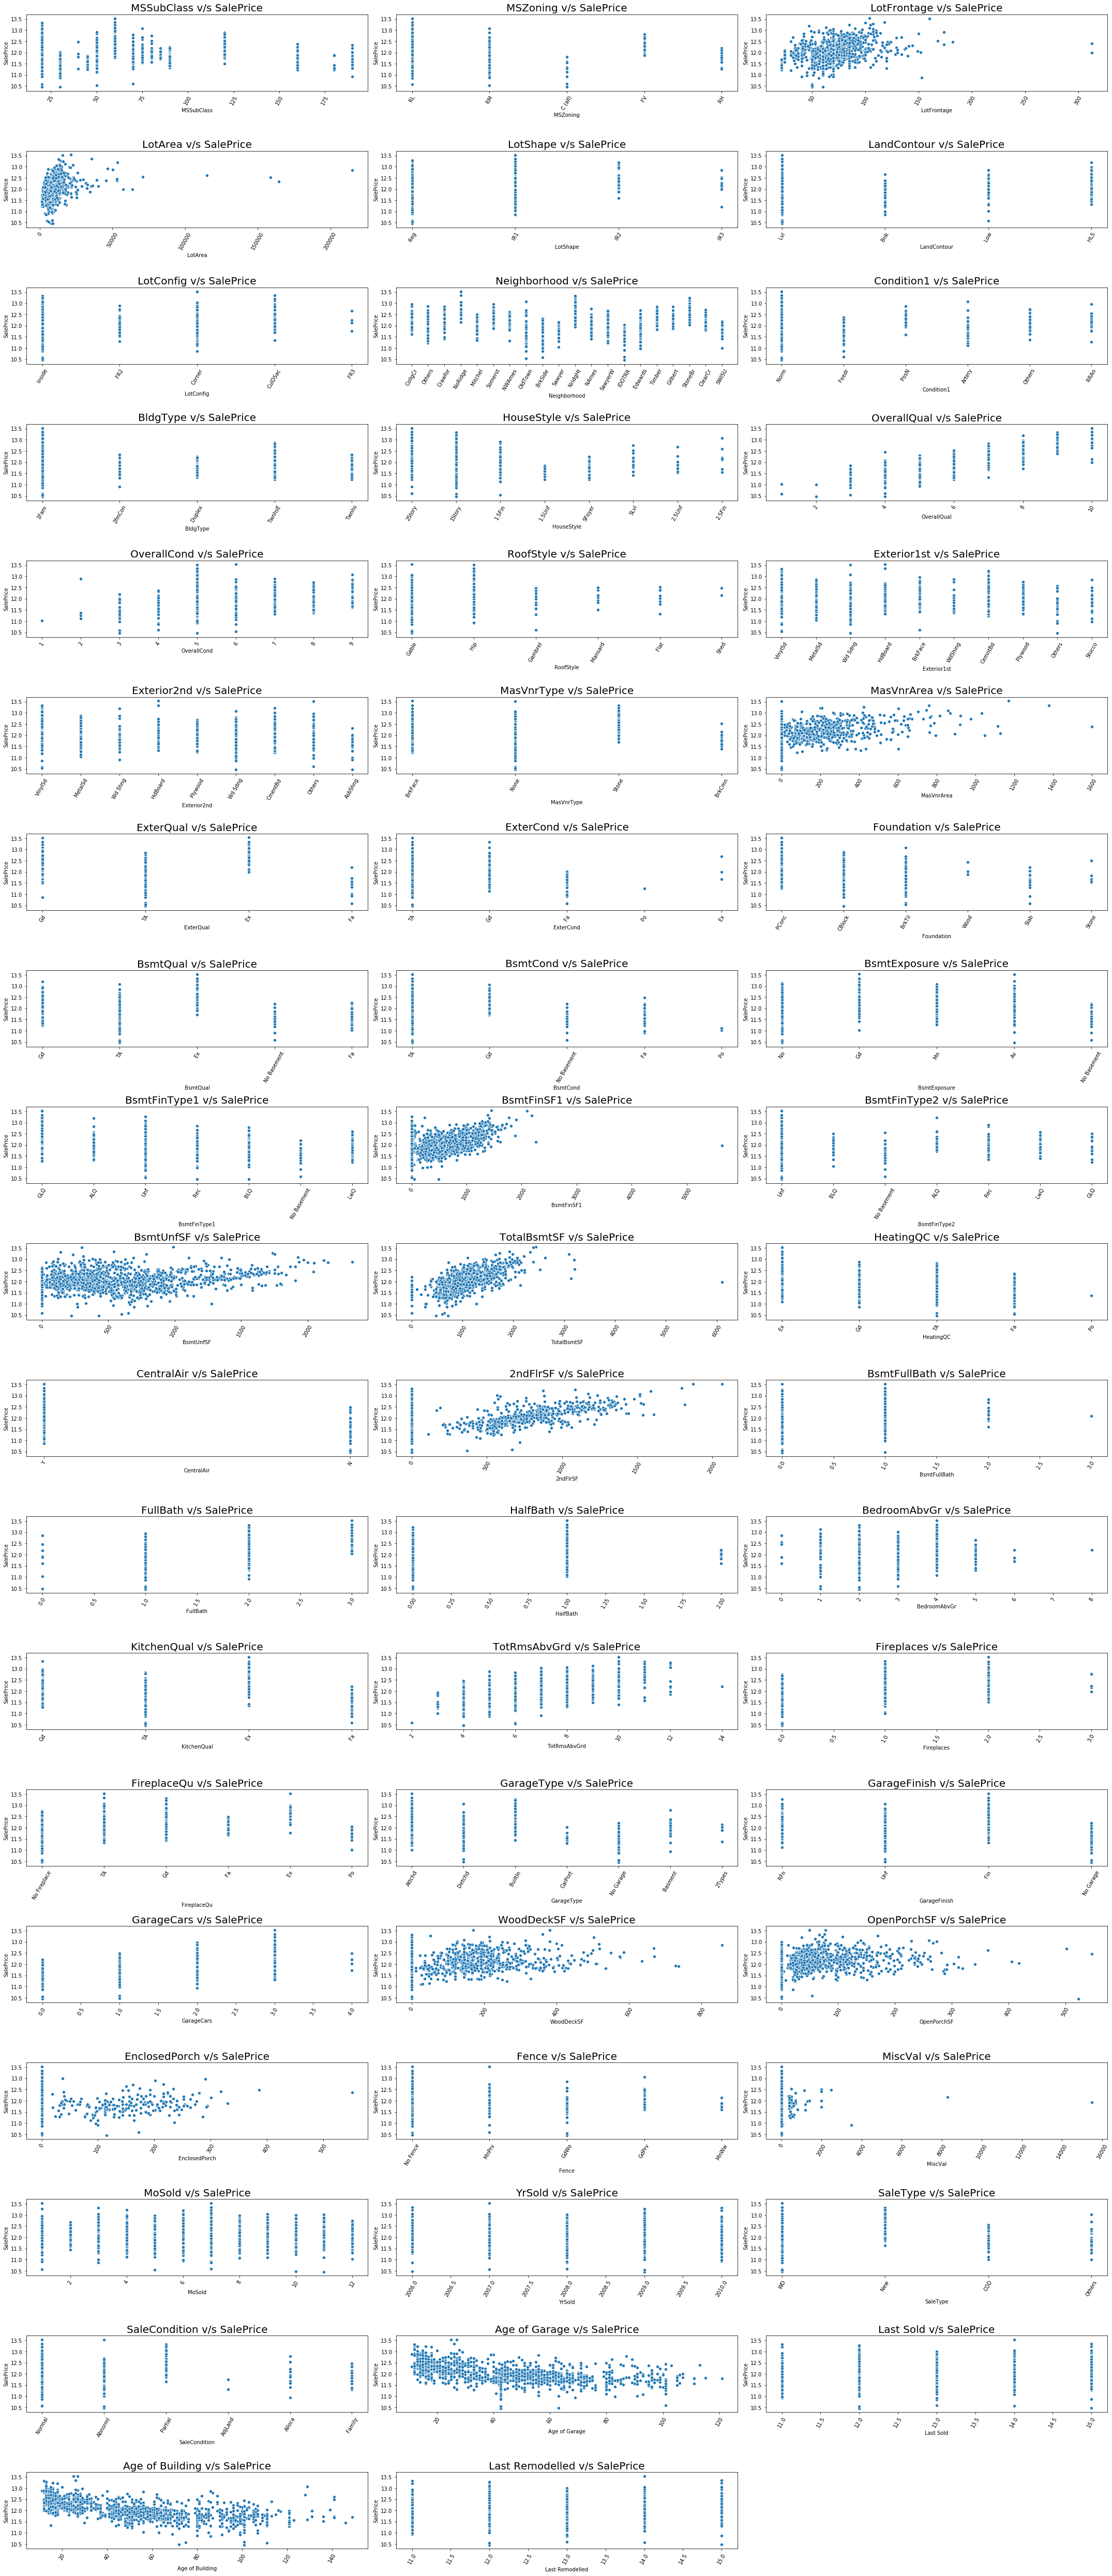

In [354]:
scatterplot(data_corr.columns,33,3)

#### INSIGHT :
1. Sale price is observed to be increasing with increasing number of cars in garages.
2. Sale price increasing with OverallQual where Overall material(9) and finish quality but few high selling houses don't have max OverallQual: Overall material and finish quality (5)
3. Sale price increasing with more fireplace and more rooms.
4. Sale price increasing with max FullBath: Full bathrooms above grade.

In [355]:
def boxplot(features, rows, cols):
    fig=plt.figure(figsize=(20,50))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        sns.boxplot(x=feature,y='SalePrice',data=data)
        plt.xticks(rotation = 90)
        ax.set_title("Boxplot for " + feature,color='blue',fontsize=20)
       
    fig.tight_layout()  
    plt.show()

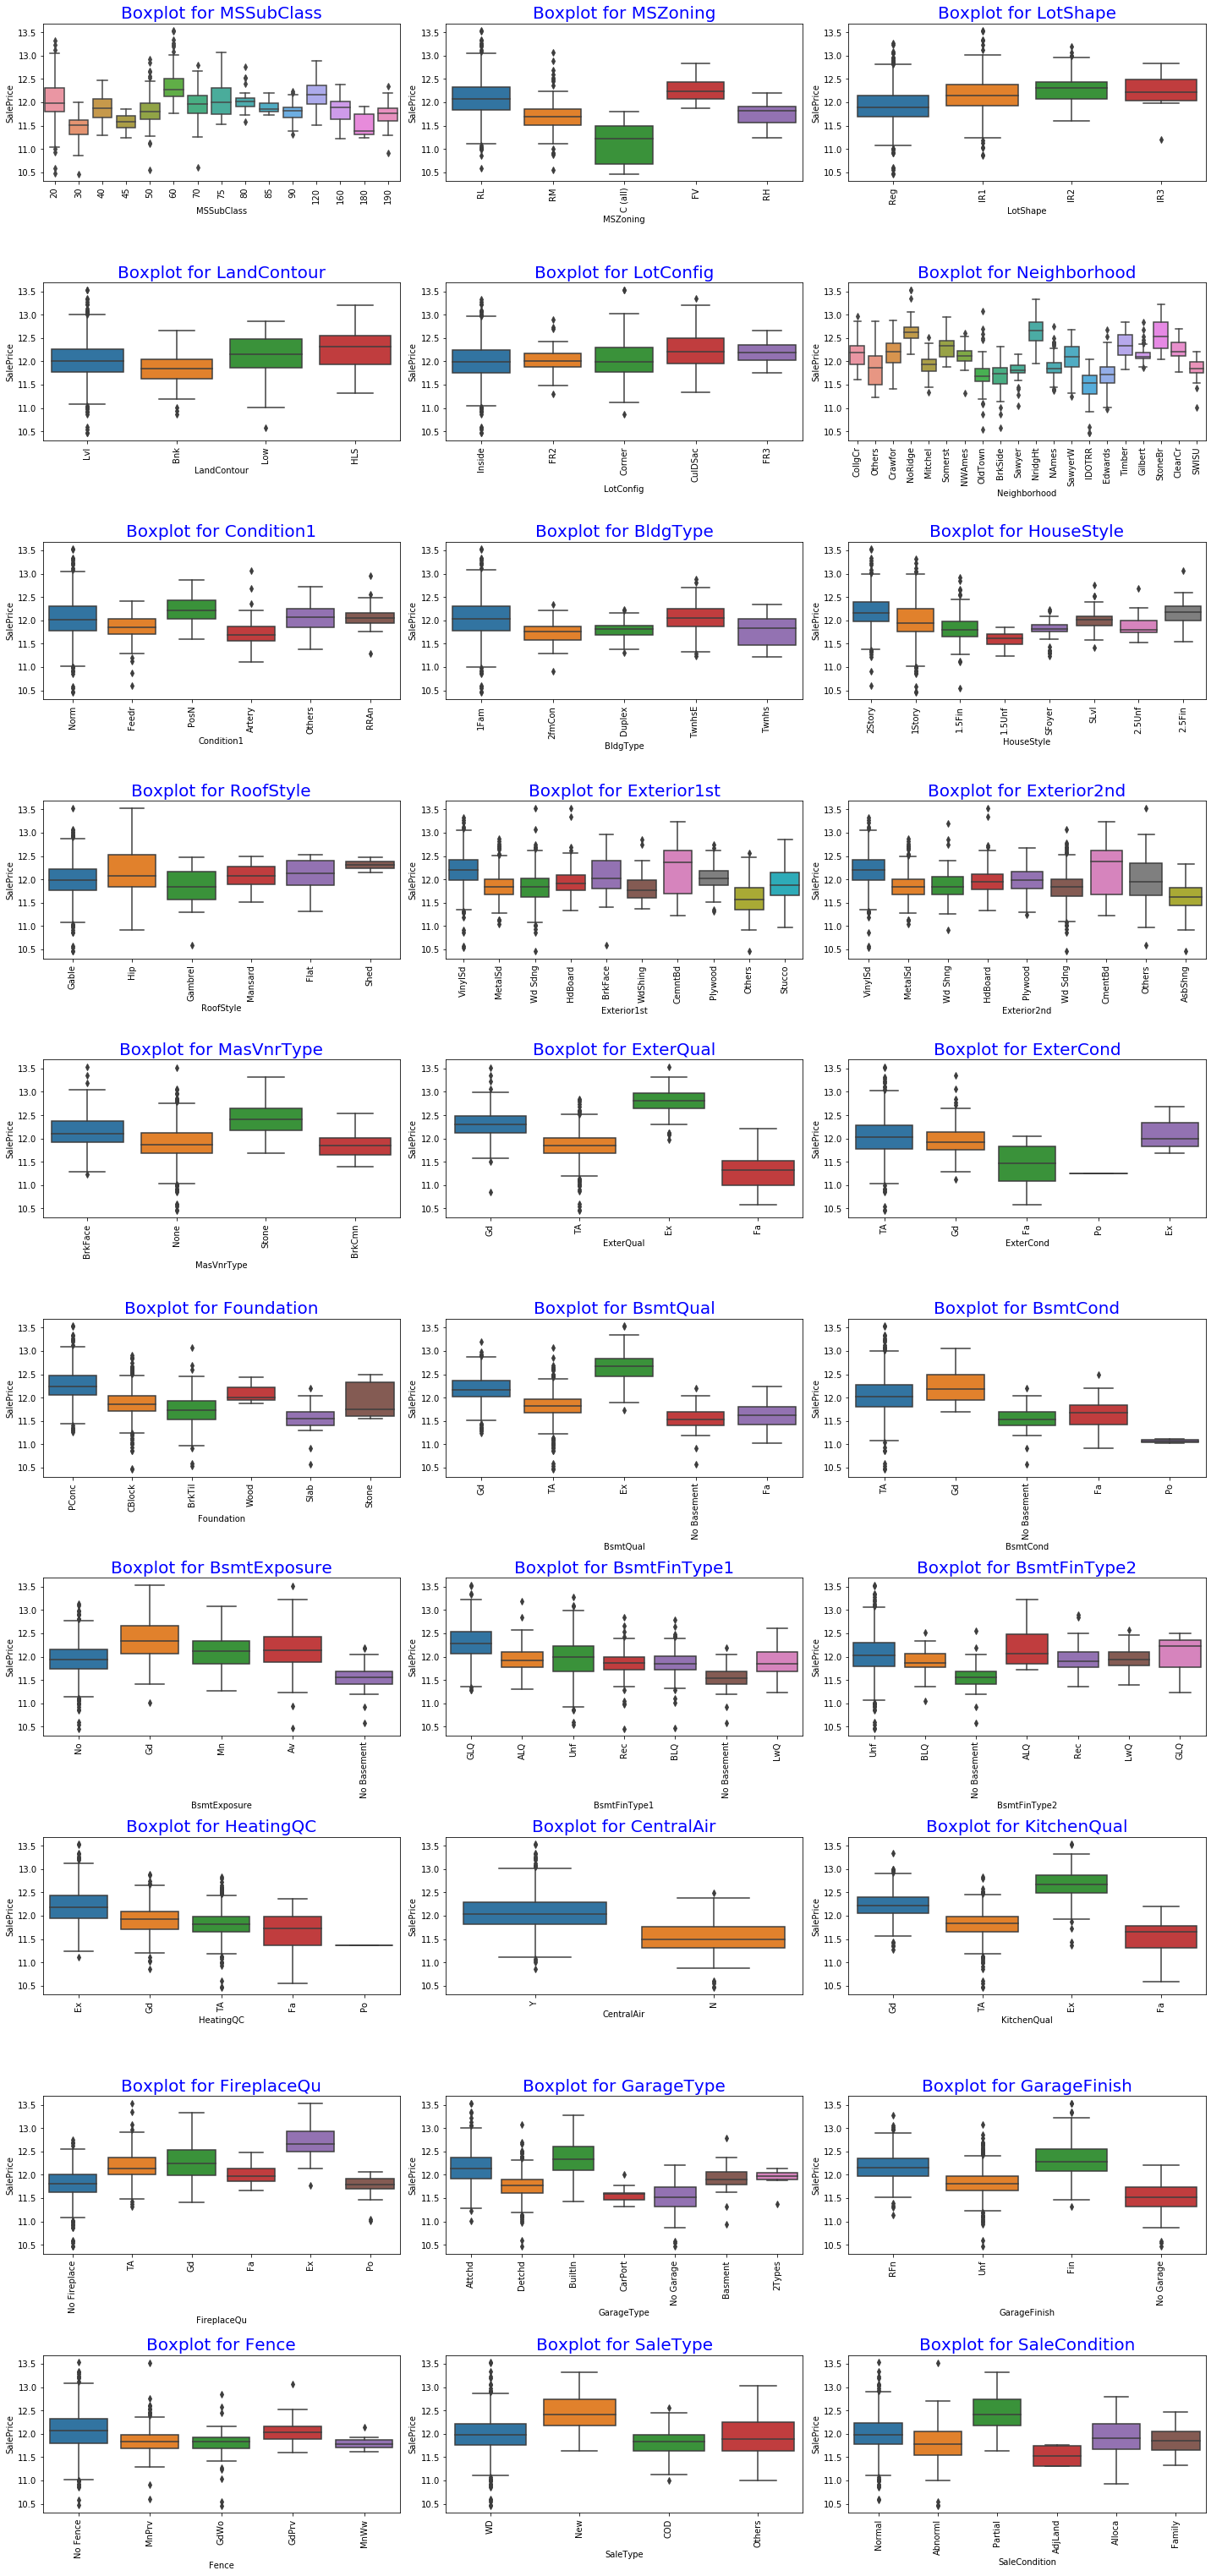

In [356]:
features=list((data_corr.dtypes[data_corr.dtypes == np.object]).index)
boxplot(features,12, 3)

#### Below are a few insights from the graphs above :
1. Median SalePrice for SaleCondition as Partial is higher than others
2. Median SalePrice for IsRemodel as No(0) is slighty higher than IsRemodel as Yes (1)
3. Median SalePrice for Fence as MnWw is least than others
4. Median SalePrice for GarageFinish as Fin is higher than others
5. Median SalePrice for GarageType as BuiltIn is higher than others

In [357]:
def boxplot_n(features, rows, cols):
    fig=plt.figure(figsize=(20,40))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        sns.boxplot(y=feature,data=data)
        plt.xticks(rotation = 90)
        ax.set_title("Boxplot for " + feature,color='red',fontsize=20)
       
    fig.tight_layout()  
    plt.show()

In [358]:
#features=list((data_corr.dtypes[data_corr.dtypes != np.object]).index)
#boxplot(features,12, 3)

#### INSIGHT :
1. Median for MoSols is 6, i.e. June
2. Median for Last Remodelled is about 28 years
3. Median for Age of Garage is 4 years

### Splitting the columns to X and Y 

In [359]:
X = data.drop('SalePrice',axis=1)
y = data['SalePrice']

### Create Dummy Variables for Categorical Data


In [360]:
data_categorical = X.select_dtypes(include=['object'])
data_categorical.head()

MSSubClass MSZoning LotShape LandContour LotConfig Neighborhood Condition1  \
0         60       RL      Reg         Lvl    Inside      CollgCr       Norm   
1         20       RL      Reg         Lvl       FR2       Others      Feedr   
2         60       RL      IR1         Lvl    Inside      CollgCr       Norm   
3         70       RL      IR1         Lvl    Corner      Crawfor       Norm   
4         60       RL      IR1         Lvl       FR2      NoRidge       Norm   

  BldgType HouseStyle RoofStyle Exterior1st Exterior2nd MasVnrType ExterQual  \
0     1Fam     2Story     Gable     VinylSd     VinylSd    BrkFace        Gd   
1     1Fam     1Story     Gable     MetalSd     MetalSd       None        TA   
2     1Fam     2Story     Gable     VinylSd     VinylSd    BrkFace        Gd   
3     1Fam     2Story     Gable     Wd Sdng     Wd Shng       None        TA   
4     1Fam     2Story     Gable     VinylSd     VinylSd    BrkFace        Gd   

  ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        TA      PConc       Gd       TA           No          GLQ   
1        TA     CBlock       Gd       TA           Gd          ALQ   
2        TA      PConc       Gd       TA           Mn          GLQ   
3        TA     BrkTil       TA       Gd           No          ALQ   
4        TA      PConc       Gd       TA           Av          GLQ   

  BsmtFinType2 HeatingQC CentralAir KitchenQual   FireplaceQu GarageType  \
0          Unf        Ex          Y          Gd  No Fireplace     Attchd   
1          Unf        Ex          Y          TA            TA     Attchd   
2          Unf        Ex          Y          Gd            TA     Attchd   
3          Unf        Gd          Y          Gd            Gd     Detchd   
4          Unf        Ex          Y          Gd            TA     Attchd   

  GarageFinish     Fence SaleType SaleCondition  
0          RFn  No Fence       WD        Normal  
1          RFn  No Fence       WD        Normal  
2          RFn  No Fence       WD        Normal  
3          Unf  No Fence       WD       Abnorml  
4          RFn  No Fence       WD        Normal

In [361]:
# convert into dummies - one hot encoding
data_dummies = pd.get_dummies(data_categorical, drop_first=True)
data_dummies.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0            0            0            1            0             0   
1            0            0            1            0             0   
2            0            0            1            0             0   
3            0            0            1            0             0   
4            0            0            1            0             0   

   LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             1                0                0   
1             0             1                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                0                0   

   LandContour_Lvl  LotConfig_CulDSac  ...  FireplaceQu_Gd  \
0                1                  0  ...               0   
1                1                  0  ...               0   
2                1                  0  ...               0   
3                1                  0  ...               1   
4                1                  0  ...               0   

   FireplaceQu_No Fireplace  FireplaceQu_Po  FireplaceQu_TA  \
0                         1               0               0   
1                         0               0               1   
2                         0               0               1   
3                         0               0               0   
4                         0               0               1   

   GarageType_Attchd  GarageType_Basment  GarageType_BuiltIn  \
0                  1                   0                   0   
1                  1                   0                   0   
2                  1                   0                   0   
3                  0                   0                   0   
4                  1                   0                   0   

   GarageType_CarPort  GarageType_Detchd  GarageType_No Garage  \
0                   0                  0                     0   
1                   0                  0                     0   
2                   0                  0                     0   
3                   0                  1                     0   
4                   0                  0                     0   

   GarageFinish_No Garage  GarageFinish_RFn  GarageFinish_Unf  Fence_GdWo  \
0                       0                 1                 0           0   
1                       0                 1                 0           0   
2                       0      

In [362]:
# drop original categorical variables 
X = X.drop(list(data_categorical.columns), axis=1)

In [363]:
# concat dummy variables with X
X = pd.concat([X, data_dummies], axis=1)

### Train - Test Split 

In [364]:
# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size = 0.7,test_size=0.3, random_state = 42)

In [365]:
#Checking the shape of the created Train & Test DFs
print(" Shape of X_train is : ",X_train.shape)
print(" Shape of y_train is : ",y_train.shape)
print(" Shape of X_test is  : ",X_test.shape)
print(" Shape of y_test is  : ",y_test.shape)

 Shape of X_train is :  (1021, 184)
 Shape of y_train is :  (1021,)
 Shape of X_test is  :  (438, 184)
 Shape of y_test is  :  (438,)


In [366]:
num_col =list((X_train.dtypes[X.dtypes != np.uint8]).index)
num_col

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'MiscVal',
 'MoSold',
 'YrSold',
 'Age of Garage',
 'Last Sold',
 'Age of Building',
 'Last Remodelled']

### Scaling of Features

In [367]:
scaler = StandardScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_train.head()

LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
135      0.419828 -0.031106     0.636468     0.391626    1.059818   -0.971407   
1452    -1.534180 -0.624789    -0.822194    -0.508937   -0.146314    0.218347   
762      0.072449 -0.186479     0.636468    -0.508937   -0.610211   -0.919206   
932      0.593518  0.081010     2.095130    -0.508937    1.141000   -0.971407   
435     -1.186801 -0.007535     0.636468     0.391626   -0.610211   -0.134012   

      BsmtUnfSF  TotalBsmtSF  2ndFlrSF  BsmtFullBath  FullBath  HalfBath  \
135    1.647353     0.546680 -0.802940     -0.814958  0.768438 -0.759102   
1452  -1.281026    -1.145636 -0.802940      1.111135 -1.068975 -0.759102   
762    0.362819    -0.678405  0.972627     -0.814958  0.768438  1.264510   
932    2.997013     1.890249 -0.802940     -0.814958  0.768438 -0.759102   
435   -1.123828    -0.582276  1.088277      1.111135  0.768438  1.264510   

      BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  WoodDeckSF  \
135       0.134113      0.279381    0.594634    0.297954    0.003763   
1452     -1.099485     -0.947493   -0.942382    0.297954   -0.740441   
762       0.134113      0.279381   -0.942382    0.297954    0.542932   
932       0.134113      0.892819    0.594634    1.668272   -0.740441   
435       0.134113     -0.334056    0.594634    0.297954    0.459399   

      OpenPorchSF  EnclosedPorch   MiscVal    MoSold    YrSold  Age of Garage  \
135     -0.716106      -0.346561 -0.123048 -0.514831  0.141155       0.358008   
1452    -0.311480      -0.346561 -0.123048 -0.514831 -1.367952      -1.092274   
762     -0.065815      -0.346561 -0.123048 -0.137485  1.650263      -1.258020   
932      2.044018      -0.346561 -0.123048 -1.269522 -0.613398      -1.133711   
435      0.165400      -0.346561 -0.123048 -0.892177  0.895709      -0.719344   

      Last Sold  Age of Building  ...  FireplaceQu_Gd  \
135   -0.141155         0.031237  ...               1   
1452   1.367952        -1.107784  ...               0   
762   -1.650263        -1.237958  ...               0   
932    0.613398        -1.140328  ...               1   
435   -0.895709        -0.814893  ...               0   

      FireplaceQu_No Fireplace  FireplaceQu_Po  FireplaceQu_TA  \
135                          0               0               0   
1452                         1               0               0   
762                          1               0               0   
932                          0               0               0   
435                          0               0               1   

      GarageType_Attchd  GarageType_Basment  GarageType_BuiltIn  \
135                   1                   0                   0   
1452                  0                   1                   0   
762                   1                   0                   0   
932                   1                   0                   0   
435                   1                   0                   0   

      GarageType_CarPort  GarageType_Detchd  GarageType_No Garage  \
135                    0                  0                     0   
1452                   0                  0                     0   
762                    0                  0                     0   
932                    0                  0                     0   
435                    0                  0                     0   

      GarageFinish_No Garage  GarageFinish_RFn  GarageFinish_Unf  Fence_GdWo  \
135                        0                 0                 1           0   
1452                       0                 0                 0           0   
762                        0                 0                 1           0   
932                        0                 0                 0           0   
435                        0                 1                 0           0   

      Fence_MnPrv  Fence_MnWw  Fence_No Fence  SaleType_New  SaleType_Others  \
135             1      

In [368]:
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
892     -0.014396 -0.206430    -0.092863     2.192751   -0.610211    0.470653   
1105     1.201432  0.132742     1.365799    -0.508937    1.488923    1.273247   
413     -0.622310 -0.158229    -0.822194     0.391626   -0.610211   -0.971407   
522     -0.882844 -0.507818    -0.092863     1.292189   -0.610211   -0.103561   
1036     0.810630  0.189418     2.095130    -0.508937   -0.204301    1.251497   

      BsmtUnfSF  TotalBsmtSF  2ndFlrSF  BsmtFullBath  FullBath  HalfBath  \
892   -0.391733    -0.001031 -0.802940     -0.814958 -1.068975 -0.759102   
1105  -0.313134     0.902134  1.741359      1.111135  0.768438  1.264510   
413    0.982629    -0.115045 -0.802940     -0.814958 -1.068975 -0.759102   
522    0.077616    -0.123987  0.693707     -0.814958  0.768438 -0.759102   
1036   0.061896     1.253116 -0.802940      1.111135  0.768438 -0.759102   

      BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  WoodDeckSF  \
892       0.134113     -0.334056   -0.942382   -1.072364    0.717593   
1105      0.134113      1.506256    2.131650    0.297954    0.672029   
413      -1.099485     -0.947493    0.594634    0.297954   -0.740441   
522       0.134113      0.279381    2.131650    0.297954   -0.740441   
1036     -1.099485     -0.334056    0.594634    1.668272    0.990974   

      OpenPorchSF  EnclosedPorch   MiscVal    MoSold    YrSold  Age of Garage  \
892     -0.716106      -0.346561 -0.123048 -1.646868 -1.367952       0.648065   
1105    -0.253676      -0.346561 -0.123048 -0.892177  1.650263      -0.636471   
413     -0.716106       1.766203 -0.123048 -1.269522  1.650263       2.139783   
522     -0.369284       0.238512 -0.123048  1.371897 -1.367952       1.186741   
1036    -0.716106      -0.346561 -0.123048  0.994551  0.895709      -1.216584   

      Last Sold  Age of Building  ...  FireplaceQu_Gd  \
892    1.367952         0.259041  ...               0   
1105  -1.650263        -0.749806  ...               0   
413   -1.650263         1.430605  ...               1   
522    1.367952         0.779736  ...               1   
1036  -0.895709        -1.172871  ...               0   

      FireplaceQu_No Fireplace  FireplaceQu_Po  FireplaceQu_TA  \
892                          1               0               0   
1105                         0               0               1   
413                          0               0               0   
522                          0               0               0   
1036                         0               0               0   

      GarageType_Attchd  GarageType_Basment  GarageType_BuiltIn  \
892                   1                   0                   0   
1105                  1                   0                   0   
413                   0                   0                   0   
522                   0                   0                   0   
1036                  1                   0                   0   

      GarageType_CarPort  GarageType_Detchd  GarageType_No Garage  \
892                    0                  0                     0   
1105                   0                  0                     0   
413                    0                  1                     0   
522                    0                  1                     0   
1036                   0                  0                     0   

      GarageFinish_No Garage  GarageFinish_RFn  GarageFinish_Unf  Fence_GdWo  \
892                        0                 1                 0           0   
1105                       0                 1                 0           0   
413                        0                 0                 1           0   
522                        0                 0                 1           0   
1036                       0                 0                 0           0   

      Fence_MnPrv  Fence_MnWw  Fence_No Fence  SaleType_New  SaleType_Others  \
892             1      

## Recursive Feature Elimination :
Identify the top significant features using RFE ( Recursive Feature Elimination) - automated approach

In [369]:
# Running RFE with the output number of the variable equal to 50
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 50)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [370]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 113),
 ('LotArea', False, 100),
 ('OverallQual', True, 1),
 ('OverallCond', False, 43),
 ('MasVnrArea', False, 125),
 ('BsmtFinSF1', False, 83),
 ('BsmtUnfSF', False, 84),
 ('TotalBsmtSF', False, 53),
 ('2ndFlrSF', False, 29),
 ('BsmtFullBath', False, 78),
 ('FullBath', False, 74),
 ('HalfBath', False, 75),
 ('BedroomAbvGr', False, 117),
 ('TotRmsAbvGrd', False, 10),
 ('Fireplaces', False, 111),
 ('GarageCars', False, 14),
 ('WoodDeckSF', False, 112),
 ('OpenPorchSF', False, 130),
 ('EnclosedPorch', False, 115),
 ('MiscVal', False, 119),
 ('MoSold', False, 121),
 ('YrSold', False, 9),
 ('Age of Garage', False, 131),
 ('Last Sold', False, 4),
 ('Age of Building', False, 86),
 ('Last Remodelled', False, 5),
 ('MSSubClass_30', True, 1),
 ('MSSubClass_40', False, 11),
 ('MSSubClass_45', True, 1),
 ('MSSubClass_50', False, 94),
 ('MSSubClass_60', False, 124),
 ('MSSubClass_70', False, 46),
 ('MSSubClass_75', True, 1),
 ('MSSubClass_80', False, 63),
 ('MSSubClass_85',

In [371]:
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'MSSubClass_30', 'MSSubClass_45', 'MSSubClass_75',
       'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190',
       'MSZoning_FV', 'LotShape_IR2', 'LandContour_HLS', 'LandContour_Low',
       'LandContour_Lvl', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'RoofStyle_Mansard', 'Exterior1st_CemntBd',
       'Exterior1st_HdBoard', 'Exterior1st_Others', 'Exterior1st_Plywood',
       'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'Exterior1st_WdShing', 'Exterior2nd_MetalSd', 'ExterCond_Gd',
       'ExterCond_TA', 'Foundation_Stone', 'BsmtQual_Fa', 'BsmtQual_Gd',
       'BsmtQual_No Basement', 'BsmtQual_TA', 'BsmtCond_No Basement',
       'BsmtExposure_Gd', 'BsmtExposure_No Basement',
       'BsmtFinType1_No Basement', 'BsmtFinType1_Unf',
       'BsmtFin

In [372]:
#Assign the 50 columns to X_train_rfe
X_train_rfe = X_train[col]

In [373]:
#Associate the new 50 columns to X_train and X_test for further analysis
X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

In [374]:
print("X_train shape :",X_train.shape)
print("X_test shape :",X_test.shape)

X_train shape : (1021, 50)
X_test shape : (438, 50)


## 1. Linear Regression model

In [375]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [376]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

12.038508796530861
[ 1.57445795e-01 -2.28586972e-01 -2.20624201e-01  1.52051818e-01
 -7.07623422e+10 -7.07623422e+10 -7.07623422e+10 -9.62912531e-02
  1.07609401e-01  9.89789963e-02  1.67519569e-01  1.03359461e-01
  1.15652084e-01  1.73487425e-01  1.48476601e-01  2.44590759e-01
  1.45133972e-01  2.14687347e-01  1.27846718e-01 -6.20841980e-03
  7.07623422e+10  7.07623422e+10  1.41507149e-01 -8.49609375e-02
 -1.48872375e-01 -1.85009003e-01 -9.30175781e-02 -1.37737274e-01
 -1.25003815e-01 -1.49776459e-01 -2.45374203e-01 -1.45532608e-01
  1.45753860e-01  1.63520813e-01  1.57494545e-01 -2.25547791e-01
 -1.41321182e-01 -9.87486519e+10 -2.36150742e-01  5.22837147e+10
  8.80393982e-02  1.54882933e+10  1.54883219e+10 -7.76367188e-02
  1.54883220e+10 -8.51287842e-02  1.51805878e-01 -9.21802521e-02
 -1.04251862e-01  2.39557266e-01]


### Evaluating the score for the Linear Regression model


In [377]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2 score of train data :",r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2 score of test data :",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS value of train data :",rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS value of test data :",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Mean Square Error of train data :",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Mean Square Error of test data :",mse_test_lr)
metric.append(mse_test_lr**0.5)

r2 score of train data : 0.8411389464238352
r2 score of test data : -2.086225466826213e+20
RSS value of train data : 25.165867730767104
RSS value of test data : 1.5501702559465157e+22
Mean Square Error of train data : 0.02464825438860637
Mean Square Error of test data : 3.539201497594785e+19


## 2. Ridge Regression Model

In [378]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge_params=[(k,v) for k,v in params.items()]

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [379]:
# display the mean scores
ridge_cv_results = pd.DataFrame(model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=30]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])[:30]

param_alpha  mean_train_score  mean_test_score  rank_test_score
13           1         -0.115973        -0.123111                1
12         0.9         -0.115978        -0.123125                2
11         0.8         -0.115985        -0.123147                3
14           2         -0.116165        -0.123153                4
10         0.7         -0.115994        -0.123185                5
9          0.6         -0.116007        -0.123237                6
8          0.5         -0.116024        -0.123300                7
15           3         -0.116565        -0.123341                8
7          0.4         -0.116047        -0.123381                9
6          0.3         -0.116076        -0.123471               10
5          0.2         -0.116108        -0.123568               11
16           4         -0.117083        -0.123652               12
4          0.1         -0.116148        -0.123690               13
3         0.05         -0.116170        -0.123757               14
2         0.01         -0.116188        -0.123812               15
1        0.001         -0.116192        -0.123825               16
0       0.0001         -0.116193        -0.123827               17
17           5         -0.117672        -0.124081               18
18           6         -0.118304        -0.124514               19
19           7         -0.118927        -0.124938               20
20           8         -0.119546        -0.125368               21
21           9         -0.120149        -0.125782               22
22          10         -0.120738        -0.126185               23
23          20         -0.125653        -0.130090               24

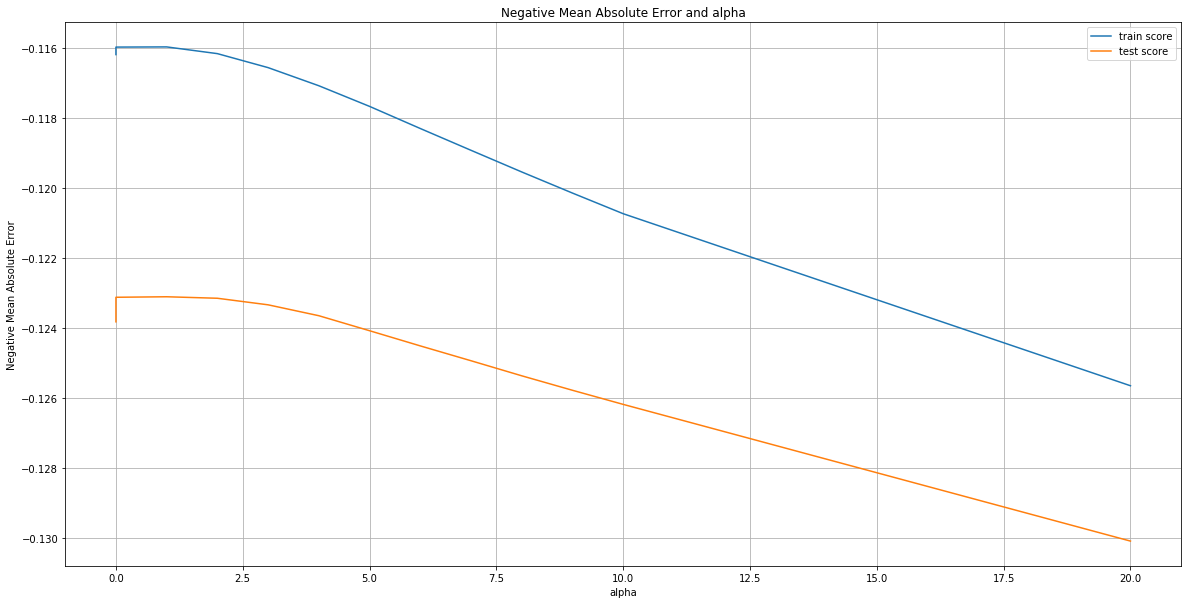

In [380]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int')

# plotting
plt.figure(figsize=(20,10))
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.grid()
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [381]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 1.0}


In [382]:
#Fitting Ridge model for alpha = 1 and printing coefficients which have been penalised
alpha = 1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.16279313 -0.22460641 -0.20401089  0.13281397 -0.06582518 -0.09659947
 -0.16387291 -0.01782373  0.10231842  0.09691743  0.15164777  0.09156892
  0.10136209  0.16637012  0.14401533  0.23188745  0.14069461  0.19903551
  0.04411987 -0.00187907 -0.19098493 -0.13531263  0.11545144 -0.05613351
 -0.12063017 -0.1508109  -0.06405741 -0.1082872  -0.09660445 -0.12418812
 -0.20439558 -0.11801756  0.12892038  0.14930401  0.12717906 -0.19776027
 -0.1285195  -0.0702601  -0.21944143 -0.0702601   0.0872001  -0.0702601
 -0.0702601  -0.07850124 -0.0702601  -0.08127489  0.14975131 -0.09126047
 -0.10565942  0.19547365]


In [383]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric1 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2 score of train data :",r2_train_lr)
metric1.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2 score of test data :",r2_test_lr)
metric1.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS value of train data :",rss1_lr)
metric1.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS value of test data :",rss2_lr)
metric1.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error of train data :",mse_train_lr)
metric1.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error of test data :",mse_test_lr)
metric1.append(mse_test_lr**0.5)

r2 score of train data : 0.8405299013050815
r2 score of test data : 0.8002923989799747
RSS value of train data : 25.26234920659514
RSS value of test data : 14.839277341324202
Mean Squared Error of train data : 0.02474275142663579
Mean Squared Error of test data : 0.033879628633160276


In [384]:
ridge_df=pd.DataFrame()
ridge_df['Features'] = X_train.columns
ridge_df['Coefficients']=ridge.coef_
ridge_df['ABS Coefficients'] = abs(ridge.coef_)
ridge_df.sort_values(by=['ABS Coefficients'],ascending=False,inplace = True)
ridge_var_selected = len(ridge_df)
print("Ridge Regression has selected {} variable".format(ridge_var_selected))
ridge_df


Ridge Regression has selected 50 variable


Features  Coefficients  ABS Coefficients
15      Neighborhood_NoRidge      0.231887          0.231887
1              MSSubClass_30     -0.224606          0.224606
38               BsmtQual_TA     -0.219441          0.219441
30       Exterior1st_WdShing     -0.204396          0.204396
2              MSSubClass_45     -0.204011          0.204011
17      Neighborhood_StoneBr      0.199036          0.199036
35               BsmtQual_Fa     -0.197760          0.197760
49      SaleCondition_Alloca      0.195474          0.195474
20            BldgType_Twnhs     -0.190985          0.190985
13      Neighborhood_ClearCr      0.166370          0.166370
6             MSSubClass_180     -0.163873          0.163873
0                OverallQual      0.162793          0.162793
10           LandContour_HLS      0.151648          0.151648
25        Exterior1st_Others     -0.150811          0.150811
46              CentralAir_Y      0.149751          0.149751
33              ExterCond_TA      0.149304          0.149304
14      Neighborhood_Crawfor      0.144015          0.144015
16      Neighborhood_NridgHt      0.140695          0.140695
21           BldgType_TwnhsE     -0.135313          0.135313
3              MSSubClass_75      0.132814          0.132814
32              ExterCond_Gd      0.128920          0.128920
36               BsmtQual_Gd     -0.128519          0.128519
34          Foundation_Stone      0.127179          0.127179
29       Exterior1st_Wd Sdng     -0.124188          0.124188
24       Exterior1st_HdBoard     -0.120630          0.120630
31       Exterior2nd_MetalSd     -0.118018          0.118018
22         RoofStyle_Mansard      0.115451          0.115451
27        Exterior1st_Stucco     -0.108287          0.108287
48  FireplaceQu_No Fireplace     -0.105659          0.105659
8                MSZoning_FV      0.102318          0.102318
12           LandContour_Lvl      0.101362          0.101362
9               LotShape_IR2      0.096917          0.096917
28       Exterior1st_VinylSd     -0.096604          0.096604
5             MSSubClass_160     -0.096599          0.096599
11           LandContour_Low      0.091569          0.091569
47            KitchenQual_TA     -0.091260          0.091260
40           BsmtExposure_Gd      0.087200          0.087200
45              HeatingQC_Fa     -0.081275          0.081275
43          BsmtFinType1_Unf     -0.078501          0.078501
42  BsmtFinType1_No Basement     -0.070260          0.070260
44  BsmtFinType2_No Basement     -0.070260          0.070260
39      BsmtCond_No Basement     -0.070260          0.070260
41  BsmtExposure_No Basement     -0.070260          0.070260
37      BsmtQual_No Basement     -0.070260          0.070260
4             MSSubClass_120     -0.065825          0.065825
26       Exterior1st_Plywood     -0.064057          0.064057
23       Exterior1st_CemntBd     -0.056134          0.056134
18           BldgType_2fmCon      0.044120          0.044120
7             MSSubClass_190     -0.017824          0.017824
19           BldgType_Duplex     -0.001879          0.001879

In [385]:
ridge_coeff_dict = dict(pd.Series(ridge.coef_, index = X_train.columns))
ridge_coeff_dict

{'OverallQual': 0.16279312899621112,
 'MSSubClass_30': -0.2246064051882916,
 'MSSubClass_45': -0.20401088720639973,
 'MSSubClass_75': 0.13281397342617454,
 'MSSubClass_120': -0.06582517856467858,
 'MSSubClass_160': -0.09659946939255921,
 'MSSubClass_180': -0.1638729126924511,
 'MSSubClass_190': -0.017823731052545706,
 'MSZoning_FV': 0.10231842249740689,
 'LotShape_IR2': 0.09691743044521248,
 'LandContour_HLS': 0.15164776727668455,
 'LandContour_Low': 0.09156891625070628,
 'LandContour_Lvl': 0.10136208749368397,
 'Neighborhood_ClearCr': 0.16637011961731027,
 'Neighborhood_Crawfor': 0.14401532709721693,
 'Neighborhood_NoRidge': 0.23188745384125195,
 'Neighborhood_NridgHt': 0.1406946069820791,
 'Neighborhood_StoneBr': 0.19903550935417555,
 'BldgType_2fmCon': 0.04411986609305256,
 'BldgType_Duplex': -0.001879067160603633,
 'BldgType_Twnhs': -0.19098493150545212,
 'BldgType_TwnhsE': -0.13531262914421255,
 'RoofStyle_Mansard': 0.1154514446586709,
 'Exterior1st_CemntBd': -0.056133514354145715

In [386]:
ridge_10= ridge_df.head(10)
ridge_10

Features  Coefficients  ABS Coefficients
15  Neighborhood_NoRidge      0.231887          0.231887
1          MSSubClass_30     -0.224606          0.224606
38           BsmtQual_TA     -0.219441          0.219441
30   Exterior1st_WdShing     -0.204396          0.204396
2          MSSubClass_45     -0.204011          0.204011
17  Neighborhood_StoneBr      0.199036          0.199036
35           BsmtQual_Fa     -0.197760          0.197760
49  SaleCondition_Alloca      0.195474          0.195474
20        BldgType_Twnhs     -0.190985          0.190985
13  Neighborhood_ClearCr      0.166370          0.166370

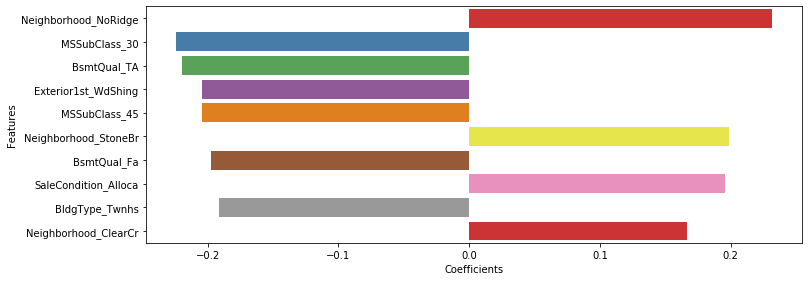

In [387]:
plt.figure(figsize=(40,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficients', palette='Set1', data = ridge_10)
plt.show()

In [388]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2_ridge = 1-(1-r2_test_lr)*(n-1)/(n-p-1)
print('R2 Score for Ridge Regression         :',r2_test_lr)
print('Adjusted R2 Score for Ridge Regression:',adjusted_r2_ridge)

R2 Score for Ridge Regression         : 0.8002923989799747
Adjusted R2 Score for Ridge Regression: 0.7744903833443125


In [389]:
import sklearn.metrics
score_ridge=ridge.score(X_test,y_test)
evs_ridge=sklearn.metrics.explained_variance_score(y_test,ridge.predict(X_test))
mae_ridge=sklearn.metrics.mean_absolute_error(y_test,ridge.predict(X_test))
mse_ridge=sklearn.metrics.mean_squared_error(y_test,ridge.predict(X_test))
r2_ridge=sklearn.metrics.r2_score(y_test,ridge.predict(X_test))
print('Score for Ridge Regression                   :',score_ridge)
print('Explained Variance Score for Ridge Regression:',evs_ridge)
print('Mean Absolute Error for Ridge Regression     :',mae_ridge)
print('Mean Square Error for Ridge Regression       :',mse_ridge)
print('R2 Score for Ridge Regression                :',r2_ridge)

Score for Ridge Regression                   : 0.8002923989799747
Explained Variance Score for Ridge Regression: 0.8004712645235108
Mean Absolute Error for Ridge Regression     : 0.13661329609631231
Mean Square Error for Ridge Regression       : 0.033879628633160276
R2 Score for Ridge Regression                : 0.8002923989799747


### 3. Lasso Regression

In [390]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [391]:
lasso_cv_results = pd.DataFrame(model_cv.cv_results_)
lasso_cv_results = lasso_cv_results[lasso_cv_results['param_alpha']<=30]
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])[:30]


param_alpha  mean_train_score  mean_test_score  rank_test_score
0       0.0001         -0.116056        -0.123604                1
1        0.001         -0.120917        -0.127157                2
2         0.01         -0.155867        -0.157925                3
3         0.05         -0.177207        -0.177392                4
4          0.1         -0.189754        -0.190089                5
5          0.2         -0.234389        -0.235036                6
6          0.3         -0.293917        -0.294621                7
21           9         -0.306490        -0.306886                8
20           8         -0.306490        -0.306886                8
19           7         -0.306490        -0.306886                8
18           6         -0.306490        -0.306886                8
17           5         -0.306490        -0.306886                8
16           4         -0.306490        -0.306886                8
15           3         -0.306490        -0.306886                8
11         0.8         -0.306490        -0.306886                8
13           1         -0.306490        -0.306886                8
12         0.9         -0.306490        -0.306886                8
22          10         -0.306490        -0.306886                8
10         0.7         -0.306490        -0.306886                8
9          0.6         -0.306490        -0.306886                8
8          0.5         -0.306490        -0.306886                8
7          0.4         -0.306490        -0.306886                8
14           2         -0.306490        -0.306886                8
23          20         -0.306490        -0.306886                8

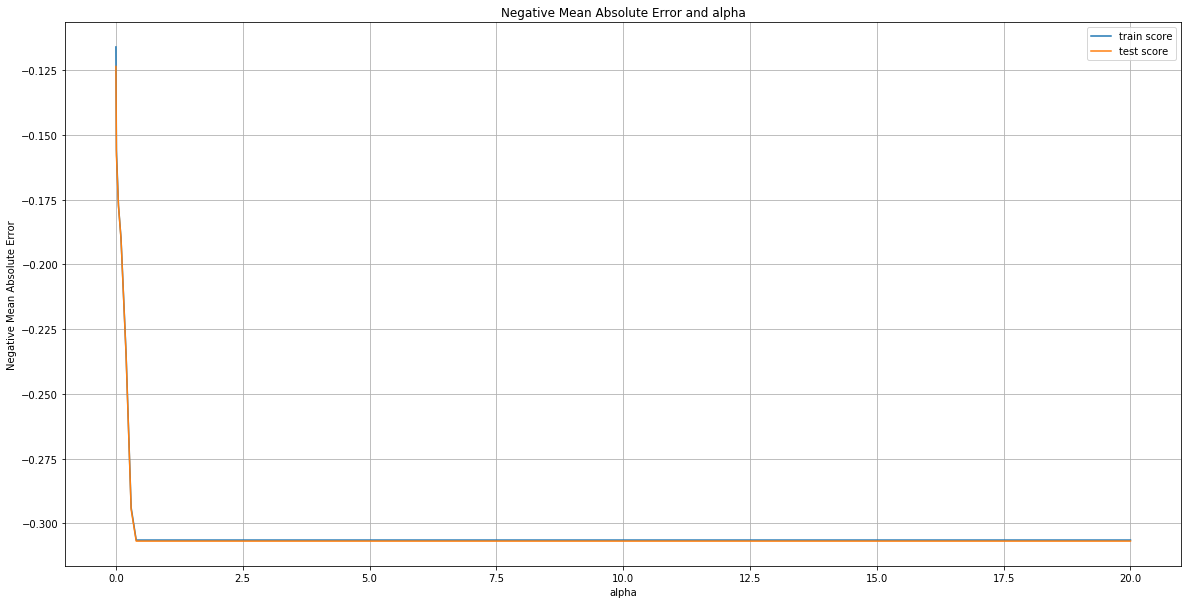

In [392]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting
plt.figure(figsize=(20,10))
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.grid()
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [393]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [394]:
#Fitting Lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [395]:
lasso.coef_

array([ 1.61072529e-01, -2.28052813e-01, -2.14750270e-01,  1.36127879e-01,
       -0.00000000e+00, -2.70295108e-02, -1.06141342e-01,  0.00000000e+00,
        1.02742519e-01,  9.61426257e-02,  1.53042079e-01,  9.01957006e-02,
        1.02184335e-01,  1.70811449e-01,  1.45087458e-01,  2.38434062e-01,
        1.42309643e-01,  2.05587832e-01,  2.51518083e-02, -1.14260361e-03,
       -2.62792856e-01, -2.03232657e-01,  1.19371721e-01, -5.74458609e-02,
       -1.24047639e-01, -1.57084970e-01, -6.71239567e-02, -1.09809228e-01,
       -9.96247613e-02, -1.26687822e-01, -2.13060465e-01, -1.20519760e-01,
        1.33691426e-01,  1.53404764e-01,  1.34221649e-01, -2.05710433e-01,
       -1.32423175e-01, -2.41692233e-01, -2.24503882e-01, -1.00857523e-01,
        8.69458139e-02, -1.19844472e-03, -1.51715281e-16, -7.78940016e-02,
       -1.36544885e-02, -8.09777767e-02,  1.49678572e-01, -9.11726851e-02,
       -1.05177371e-01,  2.14105278e-01])

In [396]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2 score of train data :",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2 score of test data :",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS value of train data :",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS value of test data :",rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Mean Square Error of train data :",mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Mean Square Error of test data :",mse_test_lr)
metric2.append(mse_test_lr**0.5)

r2 score of train data : 0.8407527897013303
r2 score of test data : 0.7976878575386442
RSS value of train data : 25.227040490125955
RSS value of test data : 15.032807845909248
Mean Square Error of train data : 0.02470816894233688
Mean Square Error of test data : 0.03432147910024943


In [397]:
lasso_df=pd.DataFrame()
lasso_df['Features'] = X_train.columns
lasso_df['Coefficients']=lasso.coef_
lasso_df['ABS Coefficients'] = abs(lasso.coef_)
lasso_df.sort_values(by=['ABS Coefficients'],ascending=False,inplace = True)
lasso_var_selected = len(lasso_df)
print("Lasso Regression has selected {} variable".format(lasso_var_selected))
lasso_df


Lasso Regression has selected 50 variable


Features  Coefficients  ABS Coefficients
20            BldgType_Twnhs -2.627929e-01      2.627929e-01
37      BsmtQual_No Basement -2.416922e-01      2.416922e-01
15      Neighborhood_NoRidge  2.384341e-01      2.384341e-01
1              MSSubClass_30 -2.280528e-01      2.280528e-01
38               BsmtQual_TA -2.245039e-01      2.245039e-01
2              MSSubClass_45 -2.147503e-01      2.147503e-01
49      SaleCondition_Alloca  2.141053e-01      2.141053e-01
30       Exterior1st_WdShing -2.130605e-01      2.130605e-01
35               BsmtQual_Fa -2.057104e-01      2.057104e-01
17      Neighborhood_StoneBr  2.055878e-01      2.055878e-01
21           BldgType_TwnhsE -2.032327e-01      2.032327e-01
13      Neighborhood_ClearCr  1.708114e-01      1.708114e-01
0                OverallQual  1.610725e-01      1.610725e-01
25        Exterior1st_Others -1.570850e-01      1.570850e-01
33              ExterCond_TA  1.534048e-01      1.534048e-01
10           LandContour_HLS  1.530421e-01      1.530421e-01
46              CentralAir_Y  1.496786e-01      1.496786e-01
14      Neighborhood_Crawfor  1.450875e-01      1.450875e-01
16      Neighborhood_NridgHt  1.423096e-01      1.423096e-01
3              MSSubClass_75  1.361279e-01      1.361279e-01
34          Foundation_Stone  1.342216e-01      1.342216e-01
32              ExterCond_Gd  1.336914e-01      1.336914e-01
36               BsmtQual_Gd -1.324232e-01      1.324232e-01
29       Exterior1st_Wd Sdng -1.266878e-01      1.266878e-01
24       Exterior1st_HdBoard -1.240476e-01      1.240476e-01
31       Exterior2nd_MetalSd -1.205198e-01      1.205198e-01
22         RoofStyle_Mansard  1.193717e-01      1.193717e-01
27        Exterior1st_Stucco -1.098092e-01      1.098092e-01
6             MSSubClass_180 -1.061413e-01      1.061413e-01
48  FireplaceQu_No Fireplace -1.051774e-01      1.051774e-01
8                MSZoning_FV  1.027425e-01      1.027425e-01
12           LandContour_Lvl  1.021843e-01      1.021843e-01
39      BsmtCond_No Basement -1.008575e-01      1.008575e-01
28       Exterior1st_VinylSd -9.962476e-02      9.962476e-02
9               LotShape_IR2  9.614263e-02      9.614263e-02
47            KitchenQual_TA -9.117269e-02      9.117269e-02
11           LandContour_Low  9.019570e-02      9.019570e-02
40           BsmtExposure_Gd  8.694581e-02      8.694581e-02
45              HeatingQC_Fa -8.097778e-02      8.097778e-02
43          BsmtFinType1_Unf -7.789400e-02      7.789400e-02
26       Exterior1st_Plywood -6.712396e-02      6.712396e-02
23       Exterior1st_CemntBd -5.744586e-02      5.744586e-02
5             MSSubClass_160 -2.702951e-02      2.702951e-02
18           BldgType_2fmCon  2.515181e-02      2.515181e-02
44  BsmtFinType2_No Basement -1.365449e-02      1.365449e-02
41  BsmtExposure_No Basement -1.198445e-03      1.198445e-03
19           BldgType_Duplex -1.142604e-03      1.142604e-03
42  BsmtFinType1_No Basement -1.517153e-16      1.517153e-16
4             MSSubClass_120 -0.000000e+00      0.000000e+00
7             MSSubClass_190  0.000000e+00      0.000000e+00

In [398]:
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'OverallQual': 0.16107252893419427,
 'MSSubClass_30': -0.22805281295083144,
 'MSSubClass_45': -0.21475026963164923,
 'MSSubClass_75': 0.13612787891324038,
 'MSSubClass_120': -0.0,
 'MSSubClass_160': -0.027029510754030147,
 'MSSubClass_180': -0.10614134166229215,
 'MSSubClass_190': 0.0,
 'MSZoning_FV': 0.10274251920627785,
 'LotShape_IR2': 0.09614262566239187,
 'LandContour_HLS': 0.15304207862446267,
 'LandContour_Low': 0.09019570056276445,
 'LandContour_Lvl': 0.10218433509266246,
 'Neighborhood_ClearCr': 0.17081144852224897,
 'Neighborhood_Crawfor': 0.14508745779691648,
 'Neighborhood_NoRidge': 0.2384340621243677,
 'Neighborhood_NridgHt': 0.1423096428510021,
 'Neighborhood_StoneBr': 0.20558783234993466,
 'BldgType_2fmCon': 0.02515180828928956,
 'BldgType_Duplex': -0.0011426036076526039,
 'BldgType_Twnhs': -0.26279285647858514,
 'BldgType_TwnhsE': -0.20323265687818026,
 'RoofStyle_Mansard': 0.11937172051148977,
 'Exterior1st_CemntBd': -0.057445860907768216,
 'Exterior1st_HdBoard': -0.1

In [399]:
lasso_10_o= lasso_df.head(10)
lasso_10_o

Features  Coefficients  ABS Coefficients
20        BldgType_Twnhs     -0.262793          0.262793
37  BsmtQual_No Basement     -0.241692          0.241692
15  Neighborhood_NoRidge      0.238434          0.238434
1          MSSubClass_30     -0.228053          0.228053
38           BsmtQual_TA     -0.224504          0.224504
2          MSSubClass_45     -0.214750          0.214750
49  SaleCondition_Alloca      0.214105          0.214105
30   Exterior1st_WdShing     -0.213060          0.213060
35           BsmtQual_Fa     -0.205710          0.205710
17  Neighborhood_StoneBr      0.205588          0.205588

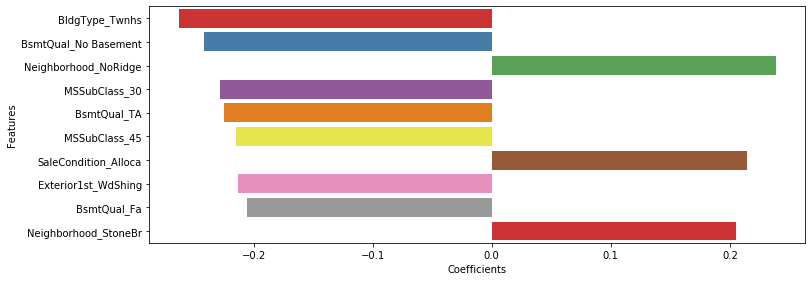

In [400]:
plt.figure(figsize=(40,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficients', palette='Set1', data = lasso_10_o)
plt.show()

In [401]:
import sklearn.metrics
score_lasso=lasso.score(X_test,y_test)
evs_lasso=sklearn.metrics.explained_variance_score(y_test,lasso.predict(X_test))
mae_lasso=sklearn.metrics.mean_absolute_error(y_test,lasso.predict(X_test))
mse_lasso=sklearn.metrics.mean_squared_error(y_test,lasso.predict(X_test))
r2_lasso=sklearn.metrics.r2_score(y_test,lasso.predict(X_test))
print('Score for Lasso Regression                   :',score_lasso)
print('Explained Variance Score for Lasso Regression:',evs_lasso)
print('Mean Absolute Error for Lasso Regression     :',mae_lasso)
print('Mean Square Error for Lasso Regression       :',mse_lasso)
print('R2 Score for Lasso Regression                :',r2_lasso)

Score for Lasso Regression                   : 0.7976878575386442
Explained Variance Score for Lasso Regression: 0.7979398750491451
Mean Absolute Error for Lasso Regression     : 0.13745811556284304
Mean Square Error for Lasso Regression       : 0.03432147910024943
R2 Score for Lasso Regression                : 0.7976878575386442


In [402]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2_lasso = 1-(1-r2_test_lr)*(n-1)/(n-p-1)
print('R2 Score for Lasso Regression         :',r2_test_lr)
print('Adjusted R2 Score for Lasso Regression:',adjusted_r2_lasso)

R2 Score for Lasso Regression         : 0.7976878575386442
Adjusted R2 Score for Lasso Regression: 0.7715493378407947


### Lets observe the changes in the coefficients after regularization

In [403]:
# Creating a table which contain all the metrics
from sklearn import linear_model, metrics
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric1, name = 'Ridge Regression')
ls_metric = pd.Series(metric2, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       8.411389e-01          0.840530          0.840753
1   R2 Score (Test)      -2.086225e+20          0.800292          0.797688
2       RSS (Train)       2.516587e+01         25.262349         25.227040
3        RSS (Test)       1.550170e+22         14.839277         15.032808
4       MSE (Train)       1.569976e-01          0.157298          0.157188
5        MSE (Test)       5.949119e+09          0.184064          0.185261

In [404]:
betas = pd.DataFrame(index=X.columns[:50],columns = ['Linear', 'Ridge', 'Lasso'])


In [405]:

betas.rows = X.columns

In [406]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [407]:
X.columns[:50]

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MiscVal',
       'MoSold', 'YrSold', 'Age of Garage', 'Last Sold', 'Age of Building',
       'Last Remodelled', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45',
       'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75',
       'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120',
       'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR2',
       'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low',
       'LandContour_Lvl'],
      dtype='object')

In [408]:
pd.set_option('display.max_rows', None)
betas.head(10)

Linear     Ridge     Lasso
LotFrontage   1.574458e-01  0.162793  0.161073
LotArea      -2.285870e-01 -0.224606 -0.228053
OverallQual  -2.206242e-01 -0.204011 -0.214750
OverallCond   1.520518e-01  0.132814  0.136128
MasVnrArea   -7.076234e+10 -0.065825 -0.000000
BsmtFinSF1   -7.076234e+10 -0.096599 -0.027030
BsmtUnfSF    -7.076234e+10 -0.163873 -0.106141
TotalBsmtSF  -9.629125e-02 -0.017824  0.000000
2ndFlrSF      1.076094e-01  0.102318  0.102743
BsmtFullBath  9.897900e-02  0.096917  0.096143

## Evaluation of Results

### Score

In [409]:
print('Score for Lasso Regression                   :',score_lasso)
print('Score for Ridge Regression                   :',score_ridge)

Score for Lasso Regression                   : 0.7976878575386442
Score for Ridge Regression                   : 0.8002923989799747


### Explained Variance

In [410]:
print('Explained Variance Score for Lasso Regression:',evs_lasso)
print('Explained Variance Score for Ridge Regression:',evs_ridge)

Explained Variance Score for Lasso Regression: 0.7979398750491451
Explained Variance Score for Ridge Regression: 0.8004712645235108


### Mean Absolute Error

In [411]:
    print('Mean Absolute Error for Lasso Regression     :',mae_lasso)
print('Mean Absolute Error for Ridge Regression     :',mae_ridge)

Mean Absolute Error for Lasso Regression     : 0.13745811556284304
Mean Absolute Error for Ridge Regression     : 0.13661329609631231


### Mean Square Error

In [412]:
print('Mean Square Error for Lasso Regression       :',mse_lasso)
print('Mean Square Error for Ridge Regression       :',mse_ridge)

Mean Square Error for Lasso Regression       : 0.03432147910024943
Mean Square Error for Ridge Regression       : 0.033879628633160276


### R2 Score

In [413]:
print('R2 Score for Lasso Regression                :',r2_lasso)
print('R2 Score for Ridge Regression                :',r2_ridge)

R2 Score for Lasso Regression                : 0.7976878575386442
R2 Score for Ridge Regression                : 0.8002923989799747


    ## Conclusion :
##### The optimal lambda value in case of Ridge and Lasso is as below:

Ridge - 1.0
Lasso - 0.0001
##### The Mean Squared error in case of Ridge and Lasso are:

Ridge - 0.03432147910024943
Lasso - 0.033879628633160276
##### The Mean Squared Error of Lasso is slightly higher than that of Ridge.

Also, since Lasso helps in feature reduction (as the coefficient value of one of the feature became 0), Lasso has a better edge over Ridge.

##### Hence based on Lasso, the factors that generally affect the price are

1. SaleCondition_Alloca
2. MSSubClass_30
3. BldgType_Twnhs
4. BsmtQual_No Basement
5. BsmtQual_TA
6. LandContour_Low
7. MSSubClass_45
8. Exterior1st_WdShing
9. BsmtQual_Fa
10. Neighborhood_StoneBr
Therefore, the variables predicted by Lasso in the above bar chart as significant variables for predicting the price of a house.

### Subjective Questions :

#### Question 1

##### What is the optimal value of alpha for ridge and lasso regression? 
 

#### Answer :
The optimal value of alpha for
1. ridge regression - 1
2. lasso regression - 0.001  


##### What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? 


In [414]:
##Ridge :
#alpha for ridge = 1, if we double it

#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.16722161 -0.21984047 -0.18860197  0.11832301 -0.06711613 -0.09953595
 -0.14635778 -0.00552223  0.09742941  0.09495499  0.14006408  0.08360069
  0.09120667  0.15941635  0.13960533  0.22043473  0.13634055  0.18553952
  0.02731806  0.00129001 -0.18280281 -0.13020705  0.09710703 -0.0376202
 -0.10179615 -0.12781921 -0.04510259 -0.08973784 -0.0776692  -0.10726524
 -0.17679887 -0.100077    0.1153137   0.13759405  0.10693239 -0.17759706
 -0.11830458 -0.06634816 -0.20620742 -0.06634816  0.08649477 -0.06634816
 -0.06634816 -0.07928409 -0.06634816 -0.07796211  0.14844663 -0.09064416
 -0.10680007  0.16472534]


In [415]:
ridge_df=pd.DataFrame()
ridge_df['Features'] = X_train.columns
ridge_df['Coefficients']=ridge.coef_
ridge_df['ABS Coefficients'] = abs(ridge.coef_)
ridge_df.sort_values(by=['ABS Coefficients'],ascending=False,inplace = True)
ridge_var_selected = len(ridge_df)
print("Ridge Regression has selected {} variable".format(ridge_var_selected))
ridge_df.head(10)


Ridge Regression has selected 50 variable


Features  Coefficients  ABS Coefficients
15  Neighborhood_NoRidge      0.220435          0.220435
1          MSSubClass_30     -0.219840          0.219840
38           BsmtQual_TA     -0.206207          0.206207
2          MSSubClass_45     -0.188602          0.188602
17  Neighborhood_StoneBr      0.185540          0.185540
20        BldgType_Twnhs     -0.182803          0.182803
35           BsmtQual_Fa     -0.177597          0.177597
30   Exterior1st_WdShing     -0.176799          0.176799
0            OverallQual      0.167222          0.167222
49  SaleCondition_Alloca      0.164725          0.164725

In [416]:
score_ridge=ridge.score(X_test,y_test)
evs_ridge=sklearn.metrics.explained_variance_score(y_test,ridge.predict(X_test))
mae_ridge=sklearn.metrics.mean_absolute_error(y_test,ridge.predict(X_test))
mse_ridge=sklearn.metrics.mean_squared_error(y_test,ridge.predict(X_test))
r2_ridge=sklearn.metrics.r2_score(y_test,ridge.predict(X_test))
print('Score for Ridge Regression                   :',score_ridge)
print('Explained Variance Score for Ridge Regression:',evs_ridge)
print('Mean Absolute Error for Ridge Regression     :',mae_ridge)
print('Mean Square Error for Ridge Regression       :',mse_ridge)
print('R2 Score for Ridge Regression                :',r2_ridge)

Score for Ridge Regression                   : 0.8030985350476985
Explained Variance Score for Ridge Regression: 0.803260307713676
Mean Absolute Error for Ridge Regression     : 0.135302933391966
Mean Square Error for Ridge Regression       : 0.03340357841082015
R2 Score for Ridge Regression                : 0.8030985350476985


In [417]:
#alpha for lasso is 0.0001
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [418]:
lasso_df=pd.DataFrame()
lasso_df['Features'] = X_train.columns
lasso_df['Coefficients']=lasso.coef_
lasso_df['ABS Coefficients'] = abs(lasso.coef_)
lasso_df.sort_values(by=['ABS Coefficients'],ascending=False,inplace = True)
lasso_var_selected = len(lasso_df)
print("Lasso Regression has selected {} variable".format(lasso_var_selected))
lasso_df.head(10)

Lasso Regression has selected 50 variable


Features  Coefficients  ABS Coefficients
20        BldgType_Twnhs     -0.261704          0.261704
15  Neighborhood_NoRidge      0.232190          0.232190
1          MSSubClass_30     -0.227162          0.227162
37  BsmtQual_No Basement     -0.227049          0.227049
38           BsmtQual_TA     -0.212718          0.212718
2          MSSubClass_45     -0.208041          0.208041
21       BldgType_TwnhsE     -0.201398          0.201398
17  Neighborhood_StoneBr      0.196567          0.196567
49  SaleCondition_Alloca      0.190104          0.190104
35           BsmtQual_Fa     -0.188794          0.188794

In [419]:
score_lasso=lasso.score(X_test,y_test)
evs_lasso=sklearn.metrics.explained_variance_score(y_test,lasso.predict(X_test))
mae_lasso=sklearn.metrics.mean_absolute_error(y_test,lasso.predict(X_test))
mse_lasso=sklearn.metrics.mean_squared_error(y_test,lasso.predict(X_test))
r2_lasso=sklearn.metrics.r2_score(y_test,lasso.predict(X_test))
print('Score for Lasso Regression                   :',score_lasso)
print('Explained Variance Score for Lasso Regression:',evs_lasso)
print('Mean Absolute Error for Lasso Regression     :',mae_lasso)
print('Mean Square Error for Lasso Regression       :',mse_lasso)
print('R2 Score for Lasso Regression                :',r2_lasso)

Score for Lasso Regression                   : 0.8003583868815843
Explained Variance Score for Lasso Regression: 0.8006068229070209
Mean Absolute Error for Lasso Regression     : 0.13609779903362473
Mean Square Error for Lasso Regression       : 0.033868434038716214
R2 Score for Lasso Regression                : 0.8003583868815843


When we double the value of alpha for both ridge and lasso, the magnitude of the coefficients(wj) , except for one(OverallQual), decreases for all other coeffiecients in both ridge and lasso regression.The smaller the value of alpha, the higher would be the magnitude of the coefficients. However the R2 score and the mean square error value also increases.

##### What will be the most important predictor variables after the change is implemented?

The most important predictor variables after the change is implemented are -

For Ridge regression -
1. Neighborhood_NoRidge - Physical locations within Ames city limits Northridge
2. MSSubClass_30 - 1-STORY 1945 & OLDER;type of dwelling involved in the sale
3. BsmtQual_TA - Basement Quality; Typical/Average
4. MSSubClass_45 - type of dwelling involved in the sale
5. Neighborhood_StoneBr- physical locations within Ames city limits Stone Brook
6. BldgType_Twnhs - Type of Dwelling
7. BsmtQual_FA - Basement Quality
8. Exterior1st_WdShing - Exterior Covering on the house Wood Shingles
9. OverallQual - Rates the overall material and finish of the house
10. SaleCondition_Alloc - Allocation - two linked properties with separate deeds, typically condo with a garage unit


For Lasso regression - 
1. BldgType_Twnhs - Type of Dwelling
2. Neighborhood_NoRidge	- Physical locations within Ames city limits Northridge
3. MSSubClass_30	- 1-STORY 1945 & OLDER;type of dwelling involved in the sale
4. BsmtQual_No Basement - Basement Quality No basement
5. BsmtQual_TA - Basement Quality; Typical/Average
6. MSSubClass_45 - type of dwelling involved in the sale
7. BldgType_TwnhsE - Type of Dwelling
8. Neighborhood_StoneBr- physical locations within Ames city limits Stone Brook
9. SaleCondition_Alloc - Allocation - two linked properties with separate deeds, typically condo with a garage unit
10. BsmtQual_FA - Basement Quality


#### Question 2

##### You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

##### ANS -
Ridge Regression - Here, changing the value of alpha would not affect the final result,i.e., getting the best predictor variables. So, I would chose the alpha value obtained in the assignment, i.e., alpha = 1.

where as , In Lasso regression, after doubling the value of alpha, the number of best predictor variables reduced  and the optimal best predictor variables were obtained. Thus I would consider the later model for Lasso regression for the alpha = 0.0002 as it would help to eliminate the least significant variables and yield best results.


#### Question 3

##### After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [420]:
lasso = Lasso()
# cross validation
X_selected = X_train.drop(['SaleCondition_Alloca','BldgType_Twnhs','MSSubClass_30','BsmtQual_No Basement','BsmtQual_TA'],axis=1)
 
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_selected, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [421]:
lasso_cv_results = pd.DataFrame(model_cv.cv_results_)
lasso_cv_results = lasso_cv_results[lasso_cv_results['param_alpha']<=30]
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])[:30]

param_alpha  mean_train_score  mean_test_score  rank_test_score
0       0.0001         -0.126780        -0.133399                1
1        0.001         -0.131156        -0.136826                2
2         0.01         -0.157585        -0.159316                3
3         0.05         -0.177207        -0.177392                4
4          0.1         -0.189754        -0.190089                5
5          0.2         -0.234389        -0.235036                6
6          0.3         -0.293917        -0.294621                7
21           9         -0.306490        -0.306886                8
20           8         -0.306490        -0.306886                8
19           7         -0.306490        -0.306886                8
18           6         -0.306490        -0.306886                8
17           5         -0.306490        -0.306886                8
16           4         -0.306490        -0.306886                8
15           3         -0.306490        -0.306886                8
11         0.8         -0.306490        -0.306886                8
13           1         -0.306490        -0.306886                8
12         0.9         -0.306490        -0.306886                8
22          10         -0.306490        -0.306886                8
10         0.7         -0.306490        -0.306886                8
9          0.6         -0.306490        -0.306886                8
8          0.5         -0.306490        -0.306886                8
7          0.4         -0.306490        -0.306886                8
14           2         -0.306490        -0.306886                8
23          20         -0.306490        -0.306886                8

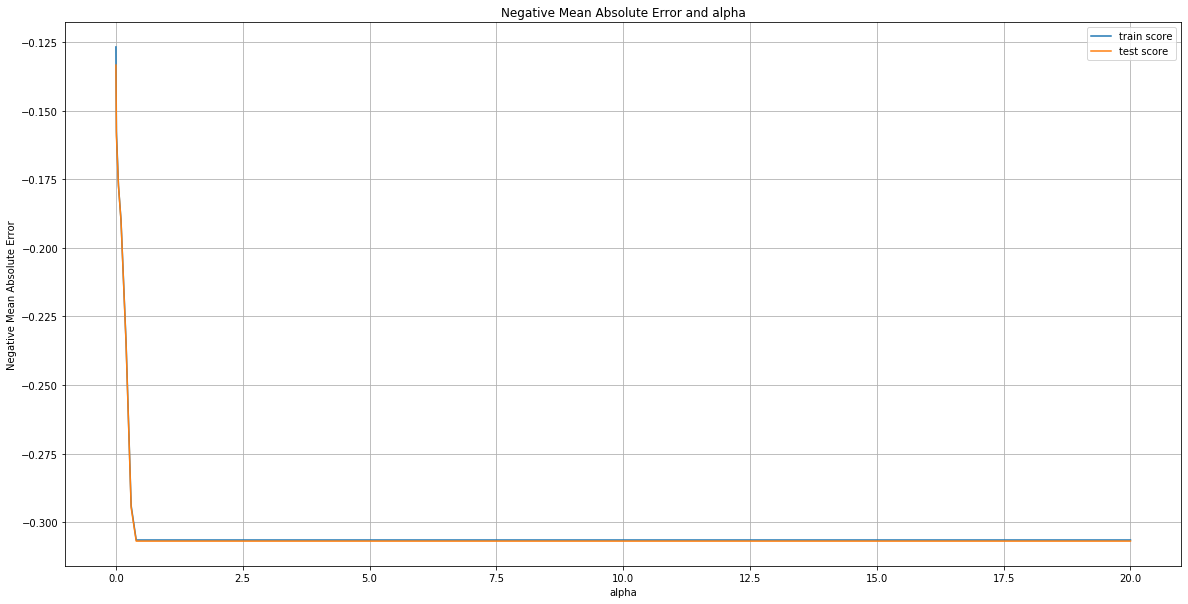

In [422]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting
plt.figure(figsize=(20,10))
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.grid()
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [423]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [424]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_selected, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [425]:
lasso.coef_

array([ 2.20113906e-01, -1.28299866e-01,  1.89962522e-02, -1.55711883e-01,
       -2.28798997e-01, -9.89405990e-02,  0.00000000e+00,  7.75569695e-02,
        7.74359501e-02,  6.21073064e-02,  3.29331921e-03,  1.72338766e-02,
        1.51077446e-01,  1.05359613e-01,  1.74479538e-01,  1.42270139e-01,
        1.34385706e-01,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -2.48486711e-02, -1.81985286e-02,
        1.35946611e-02, -3.80642666e-02,  0.00000000e+00, -6.51899441e-02,
       -8.43609967e-02, -3.61101260e-02,  2.57690347e-02,  7.07381667e-02,
        0.00000000e+00, -0.00000000e+00,  2.60616381e-02, -2.39954577e-02,
        9.35859102e-02, -1.45481439e-04, -0.00000000e+00, -7.91678071e-02,
       -1.44416273e-02, -4.89851686e-02,  1.67853405e-01, -8.39328932e-02,
       -1.11473094e-01])

In [426]:
print(lasso.coef_)
lasso_df=pd.DataFrame()
lasso_df['Features'] = X_selected.columns
lasso_df['Coefficients']=lasso.coef_
lasso_df['ABS Coefficients'] = abs(lasso.coef_)
lasso_df.sort_values(by=['ABS Coefficients'],ascending=False,inplace = True)
lasso_df.head(10)


[ 2.20113906e-01 -1.28299866e-01  1.89962522e-02 -1.55711883e-01
 -2.28798997e-01 -9.89405990e-02  0.00000000e+00  7.75569695e-02
  7.74359501e-02  6.21073064e-02  3.29331921e-03  1.72338766e-02
  1.51077446e-01  1.05359613e-01  1.74479538e-01  1.42270139e-01
  1.34385706e-01  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.48486711e-02 -1.81985286e-02
  1.35946611e-02 -3.80642666e-02  0.00000000e+00 -6.51899441e-02
 -8.43609967e-02 -3.61101260e-02  2.57690347e-02  7.07381667e-02
  0.00000000e+00 -0.00000000e+00  2.60616381e-02 -2.39954577e-02
  9.35859102e-02 -1.45481439e-04 -0.00000000e+00 -7.91678071e-02
 -1.44416273e-02 -4.89851686e-02  1.67853405e-01 -8.39328932e-02
 -1.11473094e-01]


Features  Coefficients  ABS Coefficients
4             MSSubClass_160     -0.228799          0.228799
0                OverallQual      0.220114          0.220114
14      Neighborhood_NoRidge      0.174480          0.174480
42              CentralAir_Y      0.167853          0.167853
3             MSSubClass_120     -0.155712          0.155712
12      Neighborhood_ClearCr      0.151077          0.151077
15      Neighborhood_NridgHt      0.142270          0.142270
16      Neighborhood_StoneBr      0.134386          0.134386
1              MSSubClass_45     -0.128300          0.128300
44  FireplaceQu_No Fireplace     -0.111473          0.111473